### How successful is an App ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor




In [2]:
app_store = pd.read_csv('/Users/gracechongzuting/Desktop/Jupyter Institute Data/capstone/appstore.csv')
app_review = pd.read_csv('/Users/gracechongzuting/Desktop/Jupyter Institute Data/capstone/appstore_user_reviews.csv')

In [3]:
#putting the data in dataframe
app_store_df = pd.DataFrame(app_store)
app_review_df = pd.DataFrame(app_review)



In [4]:
app_store_df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [5]:
app_store_df.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["freq"], color ="crimson").bar(subset = ["unique"], color ="green").bar(subset = ["count"], color ="blue")

In [6]:
app_review_df

App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                                                NaN       NaN   
64291                                                NaN       NaN   
64292                                                NaN       NaN   
64293                                                NaN       NaN   
64294                                                NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                    1.00                0.533333  
1                    0.25                0.288462  
2                     NaN                     NaN  
3                    0.40                0.875000  
4                    1.00                0.300000  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[64295 rows x 5 columns]

In [7]:
app_review_df.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["freq"], color ="crimson").bar(subset = ["unique"], color ="green").bar(subset = ["count"], color ="blue")

In [8]:
print(f'the "app_store_df" shape is : {app_store_df.shape}')
print(f'the "app_review_df" shape is : {app_review_df.shape}')
# Number of each type of column
print(f'\n =====App Columns=====\n {app_store_df.dtypes.value_counts()}')
print(f'=====Reviews Columns=====\n {app_review_df.dtypes.value_counts()}')

the "app_store_df" shape is : (10841, 13)
the "app_review_df" shape is : (64295, 5)

 =====App Columns=====
 object     12
float64     1
dtype: int64
=====Reviews Columns=====
 object     3
float64    2
dtype: int64


## Data Preprocessing

In [9]:
print(app_store_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [10]:
print(app_review_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


#### converts all 'empty characters' to underscore.

In [11]:
app_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
app_store_df.columns = app_store_df.columns.str.replace(" ","_")
app_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

#### let's determine percent of null values

In [13]:
def missing_data(app_store_df):
    total = app_store_df.isnull().sum().sort_values(ascending = False)
    percent = (app_store_df.isnull().sum()/app_store_df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent Null%'])

In [14]:
display(missing_data(app_store_df).head(13).style.background_gradient(cmap = 'Reds', axis = 0))

#### from above 'Percent Null%', we see 'Rating' has almost 13.6% null values, hence, we will convert this Feature to 'Median', as 'Median' is more robust than 'Mean' for handling outliers.

In [15]:
rating_mean = app_store_df["Rating"].mean()
app_store_df["Rating"].fillna(rating_mean, inplace=True)

In [16]:
app_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    1
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       3
dtype: int64

In [17]:
print(app_store_df[app_store_df.Rating>5])

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content_Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last_Updated Current_Ver Android_Ver  
10472       1.0.19  4.0 and up         NaN  


In [18]:
app_store_df.drop([10472], inplace=True)

In [19]:
app_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

In [20]:
app_store_df['Rating'].max()

5.0

In [21]:
app_store_df['Rating'].min()

1.0

In [22]:
app_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


#### let's convert 'Reviews' to numeric 'float64'

In [23]:
app_store_df["Reviews"].describe()

count     10840
unique     6001
top           0
freq        596
Name: Reviews, dtype: object

In [24]:
app_store_df["Reviews"] = app_store_df["Reviews"].apply(lambda x: int(x))


In [25]:
app_store_df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

#### Preprocess the 'Size' column 
- we see that in this column, there are some sizes in 'MB' and 'KB' and some with 'Varies with Size'. 
- Hence, we need to change 'KB' to 'MB' and ' Varies with Size' to 'NaN'

In [26]:
app_store_df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [27]:
app_store_df[~app_store_df['Size'].str.contains('[k,M,Varies with device]$', regex= True, na=False)].head()

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content_Rating, Genres, Last_Updated, Current_Ver, Android_Ver]
Index: []

In [28]:
app_store_df['Size(MB)'] = app_store_df['Size'].replace('Varies with device', 'NaN', regex=True)
app_store_df['Size(MB)']

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839     NaN
10840     19M
Name: Size(MB), Length: 10840, dtype: object

In [29]:
size =[]

for i in app_store_df['Size(MB)']:
    if i == 'NaN':
        size.append('NaN')
    elif i[-1] == 'k':
        size.append(float(i[:-1])/1000)
    else:
        size.append(float(i[:-1]))

In [30]:
app_store_df['Size(MB)'] = size
app_store_df['Size(MB)'] = app_store_df['Size(MB)'].astype(float)
app_store_df.rename(columns={app_store_df.columns[4]:'Size'}, inplace=True)

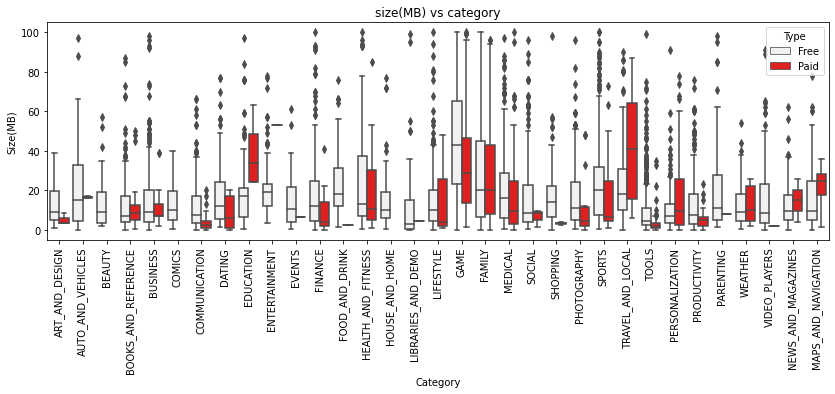

In [31]:
plt.figure(figsize=(14,4))
sns.boxplot(x='Category', y='Size(MB)', data=app_store_df, hue='Type', color='Red')
plt.xticks(rotation=90);
plt.title('size(MB) vs category')
plt.show()

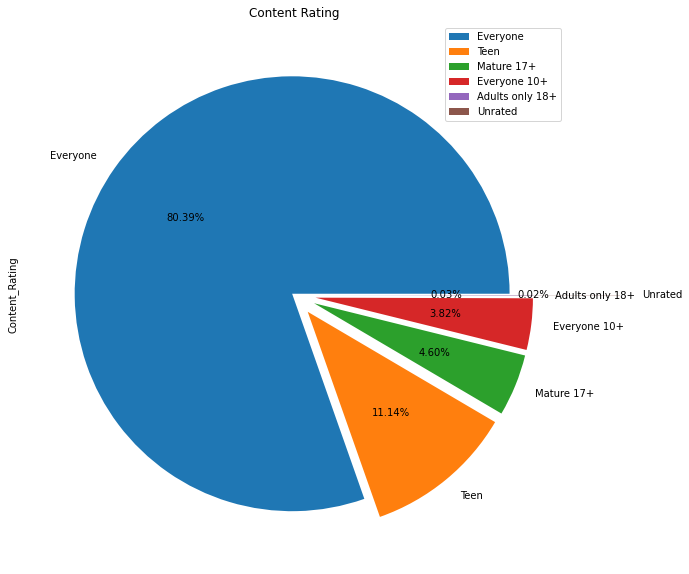

In [32]:
#colors_list = ['gold', 'lightcoral', 'lightskyblue', 'pink', 'red']
plt.figure(figsize=(40,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
app_store_df['Content_Rating'].value_counts().plot(kind='pie',autopct="%.2f%%",explode=explode)
plt.legend()
plt.title("Content Rating")
plt.show()

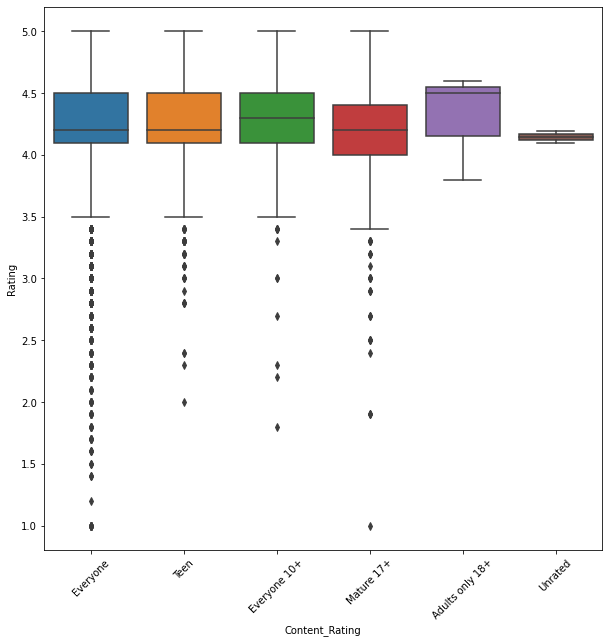

In [33]:
#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.boxplot(x="Content_Rating",y="Rating",data=app_store_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [34]:
# Now, we change Size to KB.
app_store_df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [35]:
app_store_df["Size"] = [str(round(float(i.replace("k", ""))/1024, 3)) if "k" in i else i for i in app_store_df['Size']]


In [36]:
app_store_df['Size'] = app_store_df['Size'].replace('1,000+', 0)

In [37]:
app_store_df["Size"] = app_store_df.Size.apply(lambda x: str(x).replace("M", "000"))

In [38]:
app_store_df["Size"] = app_store_df.Size.apply(lambda x: str(x).replace("k", ""))

In [39]:
app_store_df[app_store_df['Size'] == 'Varies with device'] = 0
app_store_df['Size'] = app_store_df['Size'].astype(float)

### Preprocess the 'Installs' column

In [40]:
# Converting installs from string to floating point
app_store_df["Installs"] = app_store_df.Installs.apply(lambda x: str(x).replace("+",""))
app_store_df["Installs"] = app_store_df.Installs.apply(lambda x: str(x).replace(",",""))
app_store_df["Installs"] = app_store_df.Installs.apply(lambda x: float(x))
app_store_df.Installs.dtype


dtype('float64')

In [41]:
app_store_df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839           0.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

#### Preprocess the 'Price' column

In [42]:
app_store_df['Price'] = app_store_df['Price'].apply(lambda x: str(x).replace("$",""))
app_store_df['Price'] = app_store_df['Price'].apply(lambda x:float(x))




In [43]:
app_store_df['Price'].unique()

array([  0.  ,   4.99,   6.99,   1.49,   2.99,   3.99,   7.99,   5.99,
         1.99,   9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,
        79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   3.49,  10.99,
         7.49,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   2.49,
         4.49,   1.7 ,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   1.59,   6.49,   1.29,
         5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,
         2.59,   4.8 ,   8.99,   1.96,  19.4 ,  15.46,   3.04,   4.29,
         2.6 ,   3.28,   4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,
         2.56,  30.99,   3.61, 394.99,   1.26,   1.2 ,   1.04])

In [44]:
app_store_df

App        Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                  Sketch - Draw & Paint  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
...                                                  ...             ...   
10836                                   Sya9a Maroc - FR          FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings          FAMILY   
10838                             Parkinson Exercices FR         MEDICAL   
10839                                                  0               0   
10840      iHoroscope - 2018 Daily Horoscope & Astrology       LIFESTYLE   

         Rating  Reviews     Size    Installs  Type  Price Content_Rating  \
0      4.100000      159  19000.0     10000.0  Free    0.0       Everyone   
1      3.900000      967  14000.0    500000.0  Free    0.0       Everyone   
2      4.700000    87510      8.7   5000000.0  Free    0.0       Everyone   
3      4.500000   215644  25000.0  50000000.0  Free    0.0           Teen   
4      4.300000      967      2.8    100000.0  Free    0.0       Everyone   
...         ...      ...      ...         ...   ...    ...            ...   
10836  4.500000       38  53000.0      5000.0  Free    0.0       Everyone   
10837  5.000000        4      3.6       100.0  Free    0.0       Everyone   
10838  4.193338        3      9.5      1000.0  Free    0.0       Everyone   
10839  0.000000        0      0.0         0.0     0    0.0              0   
10840  4.500000   398307  19000.0  10000000.0  Free    0.0       Everyone   

                          Genres      Last_Updated         Current_Ver  \
0                   Art & Design   January 7, 2018               1.0.0   
1      Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                   Art & Design    August 1, 2018               1.2.4   
3                   Art & Design      June 8, 2018  Varies with device   
4        Art & Design;Creativity     June 20, 2018                 1.1   
...                          ...               ...                 ...   
10836                  Education     July 25, 2017                1.48   
10837                  Education      July 6, 2018                 1.0   
10838                    Medical  January 20, 2017                 1.0   
10839                          0                 0                   0   
10840                  Lifestyle     July 25, 2018  Varies with device   

              Android_Ver  Size(MB)  
0            4.0.3 and up      19.0  
1            4.0.3 and up      14.0  
2            4.0.3 and up       8.7  
3              4.2 and up      25.0  
4              4.4 and up       2.8  
...                   ...       ...  
10836          4.1 and up      53.0  
10837          4.1 and up       3.6  
10838          2.2 and up       9.5  
10839                   0       0.0  
10840  Varies with device      19.0  

[10840 rows x 14 columns]

In [45]:
# Number of unique classes in each object column
print(f'\n======appstore object Data Set======\n {app_store_df.select_dtypes(object).apply(pd.Series.nunique, axis= 0)}')
print(f'\n======appstore all Data Set======\n {app_store_df.dtypes}')


======appstore object Data Set======
 App               8435
Category            34
Type                 3
Content_Rating       7
Genres             117
Last_Updated      1359
Current_Ver       2713
Android_Ver         34
dtype: int64

======appstore all Data Set======
 App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
Size(MB)          float64
dtype: object


## Categorial EDA

#### we want to know how does the 'Genre' correlates to either 'Free' or 'Paid'

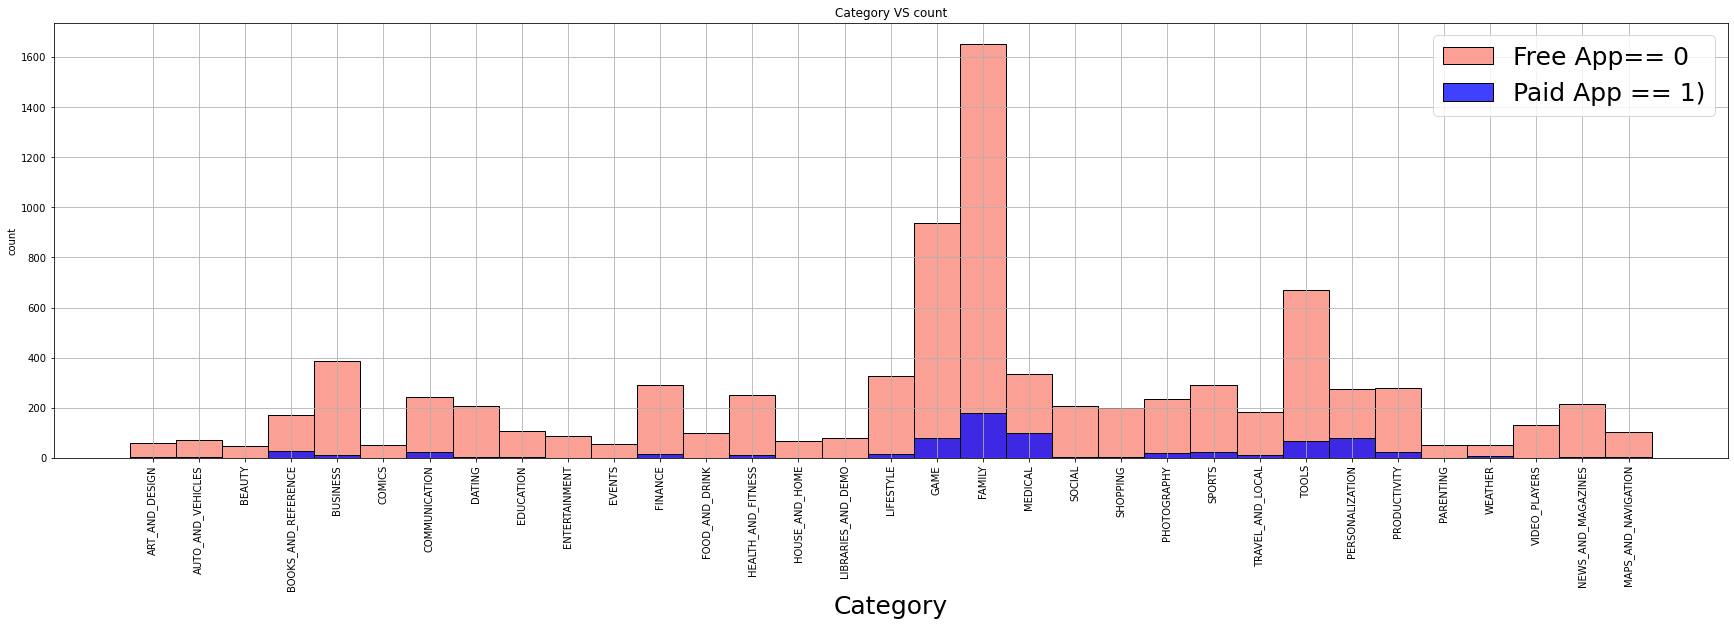

In [46]:
plt.figure(figsize = (30, 8))

# hist plot of loans that were repaid on time
sns.histplot(app_store_df.loc[app_store_df['Type'] == 'Free', 'Category'] , label = 'Free App== 0 ', color= 'salmon')

# hist plot of loans which were not repid on time
sns.histplot(app_store_df.loc[app_store_df['Type'] == 'Paid', 'Category'],label = 'Paid App == 1)', color ='b')

# Labeling of plot
plt.legend(loc = 'upper right', fontsize = 25)
plt.xlabel('Category', fontsize = 25)
plt.ylabel('count')
plt.title('Category VS count')
plt.xticks(rotation=90)
plt.grid();

In [47]:
app_store_df.Rating = app_store_df.Rating.round(2)

In [48]:
# we make different classes/dataframes for the app rating
app_rating1=app_store_df[app_store_df['Rating'] >= 4]
app_rating1=app_store_df[(app_store_df['Rating'] < 4) & (app_store_df['Rating'] > 3 )]
app_rating1=app_store_df[app_store_df['Rating'] <=3]

In [49]:
#
rating_category_df = app_store_df.groupby(['Category','Rating']).count()['App']

#create new table base on above
rating_category = pd.DataFrame()

#to name columns 'company' and 'rating'
rating_category['ART_AND_DESIGN'] = rating_category_df['ART_AND_DESIGN']
rating_category['AUTO_AND_VEHICLES'] = rating_category_df['AUTO_AND_VEHICLES']
rating_category['BEAUTY'] = rating_category_df['BEAUTY']
rating_category['BOOKS_AND_REFERENCE'] = rating_category_df['BOOKS_AND_REFERENCE']
rating_category['BUSINESS'] = rating_category_df['BUSINESS']
rating_category['COMMUNICATION'] = rating_category_df['COMMUNICATION']
rating_category['DATING'] = rating_category_df['DATING']
rating_category['EDUCATION'] = rating_category_df['EDUCATION']
rating_category['ENTERTAINMENT'] = rating_category_df['ENTERTAINMENT']
rating_category['EVENTS'] = rating_category_df['EVENTS']
rating_category['FINANCE'] = rating_category_df['FINANCE']
rating_category['FOOD_AND_DRINK'] = rating_category_df['FOOD_AND_DRINK']
rating_category['HEALTH_AND_FITNESS'] = rating_category_df['HEALTH_AND_FITNESS']
rating_category['HOUSE_AND_HOME'] = rating_category_df['HOUSE_AND_HOME']
rating_category['LIBRARIES_AND_DEMO'] = rating_category_df['LIBRARIES_AND_DEMO']
rating_category['LIFESTYLE'] = rating_category_df['LIFESTYLE']
rating_category['GAME'] = rating_category_df['GAME']
rating_category['FAMILY'] = rating_category_df['FAMILY']
rating_category['MEDICAL'] = rating_category_df['MEDICAL']
rating_category['SOCIAL'] = rating_category_df['SOCIAL']
rating_category['SHOPPING'] = rating_category_df['SHOPPING']
rating_category['PHOTOGRAPHY'] = rating_category_df['PHOTOGRAPHY']
rating_category['SPORTS'] = rating_category_df['SPORTS']
rating_category['TRAVEL_AND_LOCAL'] = rating_category_df['TRAVEL_AND_LOCAL']
rating_category['TOOLS'] = rating_category_df['TOOLS']
rating_category['PERSONALIZATION'] = rating_category_df['PERSONALIZATION']
rating_category['PRODUCTIVITY'] = rating_category_df['PRODUCTIVITY']
rating_category['PARENTING'] = rating_category_df['PARENTING']
rating_category['WEATHER'] = rating_category_df['WEATHER']
rating_category['VIDEO_PLAYERS'] = rating_category_df['VIDEO_PLAYERS']
rating_category['NEWS_AND_MAGAZINES'] = rating_category_df['NEWS_AND_MAGAZINES']
rating_category['MAPS_AND_NAVIGATION'] = rating_category_df['MAPS_AND_NAVIGATION']





rating_category
#to change index

ART_AND_DESIGN  AUTO_AND_VEHICLES  BEAUTY  BOOKS_AND_REFERENCE  \
Rating                                                                   
3.20                 1                2.0     NaN                    1   
3.40                 1                NaN     NaN                    4   
3.80                 3                1.0     1.0                    2   
3.90                 2                5.0     3.0                    9   
4.00                 3                9.0     4.0                    4   
4.10                 6                NaN     3.0                   13   
4.19                 3               12.0    10.0                   53   
4.20                 7                6.0     3.0                    9   
4.30                 4                6.0     3.0                    7   
4.40                 6                5.0     3.0                   15   
4.50                 4                5.0     5.0                   13   
4.60                 3                6.0     3.0                   20   
4.70                13                NaN     5.0                   17   
4.80                 5                4.0     1.0                   11   
5.00                 1                NaN     NaN                    5   

        BUSINESS  COMMUNICATION  DATING  EDUCATION  ENTERTAINMENT  EVENTS  \
Rating                                                                      
3.20           1              1     NaN        NaN            NaN     NaN   
3.40           9              5     5.0        NaN            NaN     NaN   
3.80          10              7     4.0        2.0            6.0     1.0   
3.90           7             13    12.0        2.0            6.0     NaN   
4.00          13             19     8.0       10.0            7.0     4.0   
4.10          17             22    25.0        5.0           11.0     2.0   
4.19         154             54    39.0        1.0            NaN    19.0   
4.20          19             23    18.0        8.0           20.0     1.0   
4.30          23             28     5.0       19.0           12.0     3.0   
4.40          27             28    19.0       14.0            7.0     5.0   
4.50          18             13     7.0       13.0            9.0     4.0   
4.60          15             11     4.0       20.0            3.0     6.0   
4.70          14              1     7.0       12.0            1.0     1.0   
4.80          10              6     7.0        2.0            NaN     4.0   
5.00          18              5     6.0        NaN            NaN     5.0   

        ...  SPORTS  TRAVEL_AND_LOCAL  TOOLS  PERSONALIZATION  PRODUCTIVITY  \
Rating  ...                                                                   
3.20    ...       1                 3      8                2             4   
3.40    ...       3                 3     17                1             3   
3.80    ...       3                 5     20                5             7   
3.90    ...      13                 6     41                8             8   
4.00    ...      21                 7     38                8            18   
4.10    ...      21                15     53               30            17   
4.19    ...      64                32    105               75            68   
4.20    ...      17                16     68               37            28   
4.30    ...      29                13     66               30            23   
4.40    ...      32                25     52               33            24   
4.50    ...      28                14     45               38            23   
4.60    ...      29                 7     40               25            21   
4.70    ...       8                 7     24               25            13   
4.80    ...       4                 1     10               10             4   
5.00    ...       4                 3     17               10             8   

        PARENTING  WEATHER  VIDEO_PLAYERS  NEWS_AND_MAGAZINES  \
Rating                        

<AxesSubplot:ylabel='Rating'>

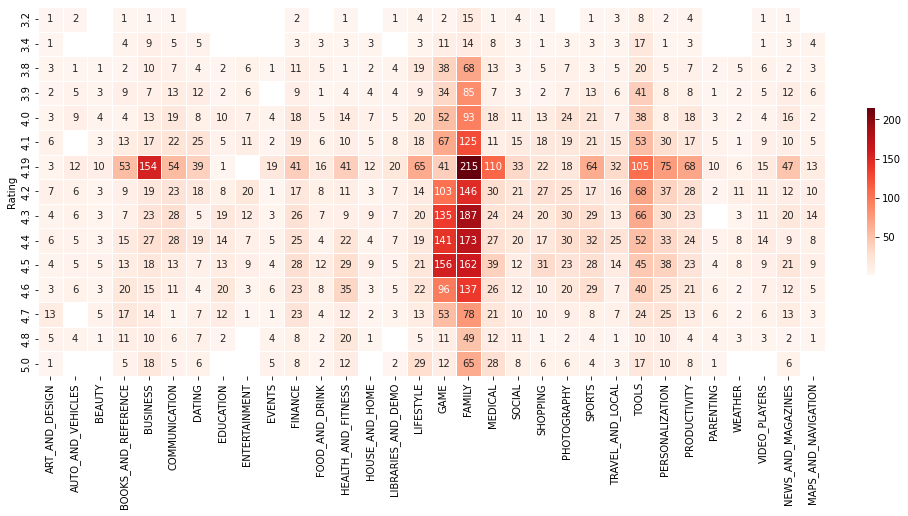

In [50]:
plt.figure(figsize =(15,18))

sns.heatmap(rating_category,square= True, cbar_kws={'fraction': 0.01}, cmap= 'Reds', linewidth = 1, annot= True, fmt ='g')

In [51]:
#
rating_category_df = app_store_df.groupby(['Category','Rating']).count()['App']

#create new table base on above
rating_category = pd.DataFrame()

#to name columns 'company' and 'rating'

rating_category['BUSINESS'] = rating_category_df['BUSINESS']
rating_category['DATING'] = rating_category_df['DATING']
rating_category['EDUCATION'] = rating_category_df['EDUCATION']
rating_category['FINANCE'] = rating_category_df['FINANCE']
rating_category['FOOD_AND_DRINK'] = rating_category_df['FOOD_AND_DRINK']
rating_category['HEALTH_AND_FITNESS'] = rating_category_df['HEALTH_AND_FITNESS']
rating_category['GAME'] = rating_category_df['GAME']
rating_category['FAMILY'] = rating_category_df['FAMILY']
rating_category['MEDICAL'] = rating_category_df['MEDICAL']
rating_category['SOCIAL'] = rating_category_df['SOCIAL']
rating_category['SHOPPING'] = rating_category_df['SHOPPING']
rating_category['SPORTS'] = rating_category_df['SPORTS']
rating_category['PARENTING'] = rating_category_df['PARENTING']
rating_category = rating_category.reset_index()
rating_category

Rating  BUSINESS  DATING  EDUCATION  FINANCE  FOOD_AND_DRINK  \
0     1.00         1     1.0        NaN      2.0             NaN   
1     1.70         1     NaN        NaN      1.0             1.0   
2     2.00         1     NaN        NaN      2.0             NaN   
3     2.10         1     NaN        NaN      1.0             NaN   
4     2.30         1     NaN        NaN      1.0             NaN   
5     2.40         2     NaN        NaN      2.0             NaN   
6     2.50         1     3.0        NaN      1.0             NaN   
7     2.60         1     1.0        NaN      NaN             NaN   
8     2.70         3     2.0        NaN      1.0             NaN   
9     2.90         3     1.0        NaN      6.0             1.0   
10    3.00         6     5.0        NaN      1.0             NaN   
11    3.10         5     1.0        NaN      1.0             1.0   
12    3.20         1     NaN        NaN      2.0             NaN   
13    3.30         2     5.0        NaN      1.0             2.0   
14    3.40         9     5.0        NaN      3.0             3.0   
15    3.50         3    12.0        1.0      7.0             1.0   
16    3.60         4     5.0        NaN      7.0             6.0   
17    3.70         7     3.0        NaN      6.0             4.0   
18    3.80        10     4.0        2.0     11.0             5.0   
19    3.90         7    12.0        2.0      9.0             1.0   
20    4.00        13     8.0       10.0     18.0             5.0   
21    4.10        17    25.0        5.0     19.0             6.0   
22    4.19       154    39.0        1.0     41.0            16.0   
23    4.20        19    18.0        8.0     17.0             8.0   
24    4.30        23     5.0       19.0     26.0             7.0   
25    4.40        27    19.0       14.0     25.0             4.0   
26    4.50        18     7.0       13.0     28.0            12.0   
27    4.60        15     4.0       20.0     23.0             8.0   
28    4.70        14     7.0       12.0     23.0             4.0   
29    4.80        10     7.0        2.0      8.0             2.0   
30    4.90         3     1.0        2.0      2.0             NaN   
31    5.00        18     6.0        NaN      8.0             2.0   

    HEALTH_AND_FITNESS   GAME  FAMILY  MEDICAL  SOCIAL  SHOPPING  SPORTS  \
0                  NaN    1.0     3.0      3.0     NaN       NaN     NaN   
1                  NaN    NaN     2.0      NaN     NaN       NaN     NaN   
2                  1.0    NaN     1.0      1.0     NaN       NaN     NaN   
3                  1.0    NaN     NaN      NaN     NaN       NaN     NaN   
4                  2.0    1.0     3.0      2.0     NaN       1.0     NaN   
5                  3.0    1.0     5.0      2.0     1.0       NaN     1.0   
6                  NaN    1.0     NaN      1.0     NaN       NaN     NaN   
7                  4.0    NaN     2.0      4.0     NaN       NaN     1.0   
8                  1.0    1.0     2.0      2.0     NaN       NaN     1.0   
9                  3.0    NaN    10.0      1.0     1.0       NaN     1.0   
10                 1.0    1.0    19.0      5.0     1.0       2.0     2.0   
11                 NaN    4.0    13.0      3.0     NaN       1.0     2.0   
12                 1.0    2.0    15.0      1.0     4.0       1.0     1.0   
13                 3.0    6.0    21.0      NaN     NaN       2.0     3.0   
14                 3.0   11.0    14.0      8.0     3.0       1.0     3.0   
15                 6.0   10.0    30.0      6.0     1.0       NaN     7.0   
16                 1.0   15.0    38.0      8.0     5.0       5.0     3.0   
17                 3.0   16.0    41.0     11.0     6.0       5.0     7.0   
18                 1.0   38.0    68.0     13.0     3.0       5.0     3.0   
19                 4.0   34.0    85.0      7.0     3.0       2.0    13.0   
20                14.0   52.0    93.0     18.0    11.0      13.0    21.0   
21                10.0   67.0   125.0     11.0    15.0      18.0    21.0   
22         

In [52]:
from matplotlib.pyplot import figure

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.7'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.1'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.6'),
  Text(8, 0, '2.7'),
  Text(9, 0, '2.9'),
  Text(10, 0, '3.0'),
  Text(11, 0, '3.1'),
  Text(12, 0, '3.2'),
  Text(13, 0, '3.3'),
  Text(14, 0, '3.4'),
  Text(15, 0, '3.5'),
  Text(16, 0, '3.6'),
  Text(17, 0, '3.7'),
  Text(18, 0, '3.8'),
  Text(19, 0, '3.9'),
  Text(20, 0, '4.0'),
  Text(21, 0, '4.1'),
  Text(22, 0, '4.19'),
  Text(23, 0, '4.2'),
  Text(24, 0, '4.3'),
  Text(25, 0, '4.4'),
  Text(26, 0, '4.5'),
  Text(27, 0, '4.6'),
  Text(28, 0, '4.7'),
  Text(29, 0, '4.8'),
  Text(30, 0, '4.9'),
  Text(31, 0, '5.0')])

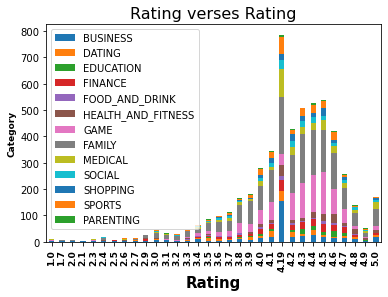

In [53]:
#plt.figure(figsize =(15,15))
rating_category.set_index('Rating').plot(kind='bar', stacked=True)
plt.title('Rating verses Rating', fontsize=16)
plt.xlabel('Rating',fontweight = 'heavy', fontsize = 15)
plt.ylabel('Category',fontweight = 'heavy', fontsize = 9)
plt.xticks(rotation=90,fontweight = 'heavy', fontsize = 9)

#### Hence, from above, it is an unbalanced dataset, we will need to do LabelEncoder for each of the sub-category. 

In [54]:
app_store_df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 0, 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [55]:
#app_store_df_nonzero.drop(app_store_df[app_store_df['Content_Rating'] == 0].index, inplace = True)
#print(app_store_df_nonzero)

In [56]:
app_store_df.Rating = app_store_df.Rating.round(2)

In [57]:
#
rating_content_df = app_store_df.groupby(['Content_Rating','Rating']).count()['App']

#create new table base on above
rating_content = pd.DataFrame()

#to name columns 'company' and 'rating'
rating_content['EVERYONE'] = rating_content_df['Everyone']
rating_content['TEEN'] = rating_content_df['Teen']
rating_content['EVERYONE 10+'] = rating_content_df['Everyone 10+']
rating_content['MATURE 17+'] = rating_content_df['Mature 17+']
rating_content['ADULTS ONLY 18+'] = rating_content_df['Adults only 18+']
rating_content['UNRATED'] = rating_content_df['Unrated']

rating_content
#to change index

EVERYONE   TEEN  EVERYONE 10+  MATURE 17+  ADULTS ONLY 18+  UNRATED
Rating                                                                     
1.00          15    NaN           NaN         1.0              NaN      NaN
1.20           1    NaN           NaN         NaN              NaN      NaN
1.40           3    NaN           NaN         NaN              NaN      NaN
1.50           3    NaN           NaN         NaN              NaN      NaN
1.60           4    NaN           NaN         NaN              NaN      NaN
1.70           8    NaN           NaN         NaN              NaN      NaN
1.80           7    NaN           1.0         NaN              NaN      NaN
1.90           9    NaN           NaN         3.0              NaN      NaN
2.00          10    1.0           NaN         NaN              NaN      NaN
2.10           8    NaN           NaN         NaN              NaN      NaN
2.20          13    NaN           1.0         NaN              NaN      NaN
2.30          18    1.0           1.0         NaN              NaN      NaN
2.40          16    2.0           NaN         1.0              NaN      NaN
2.50          15    NaN           NaN         4.0              NaN      NaN
2.60          24    NaN           NaN         NaN              NaN      NaN
2.70          19    NaN           1.0         3.0              NaN      NaN
2.80          38    4.0           NaN         NaN              NaN      NaN
2.90          39    1.0           NaN         3.0              NaN      NaN
3.00          63    4.0           2.0         5.0              NaN      NaN
3.10          57    4.0           NaN         1.0              NaN      NaN
3.20          51    6.0           NaN         3.0              NaN      NaN
3.30          76   15.0           1.0         6.0              NaN      NaN
3.40          94    8.0           5.0         8.0              NaN      NaN
3.50         125   12.0           3.0        13.0              NaN      NaN
3.60         129   15.0           3.0        11.0              NaN      NaN
3.70         165   14.0           5.0        14.0              NaN      NaN
3.80         218   38.0          10.0         6.0              NaN      NaN
3.90         255   41.0          14.0        23.0              NaN      NaN
4.00         377   57.0          21.0        26.0              NaN      NaN
4.10         452   79.0          22.0        40.0              NaN      1.0
4.19        1244  119.0          14.0        38.0              NaN      1.0
4.20         565  103.0          32.0        40.0              NaN      NaN
4.30         643  104.0          45.0        26.0              NaN      NaN
4.40         660   91.0          43.0        41.0              NaN      NaN
4.50         637  110.0          43.0        31.0              1.0      NaN
4.60         513   65.0          43.0        24.0              1.0      NaN
4.70         352   41.0          14.0        14.0              NaN      NaN
4.80         180   23.0           5.0         8.0              NaN      NaN
4.90          76    7.0           1.0         2.0              NaN      NaN
5.00         234   22.0           2.0        11.0              NaN      NaN

<AxesSubplot:xlabel='Rating'>

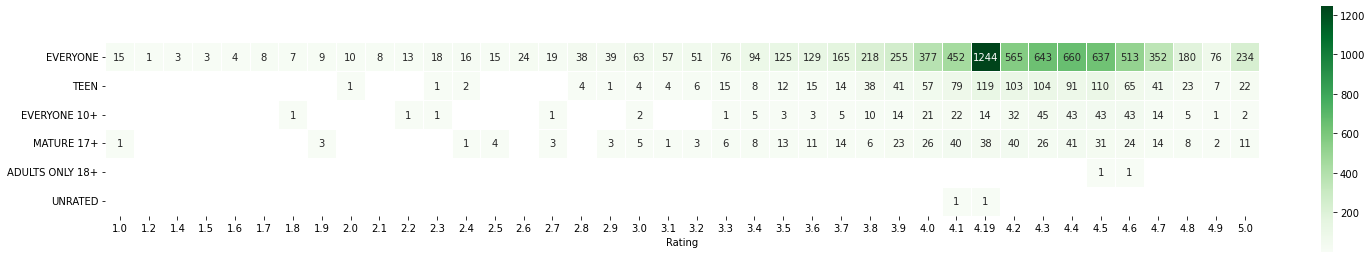

In [58]:
plt.figure(figsize =(22,22))

sns.heatmap(rating_content.T,square= True, cbar_kws={'fraction': 0.01}, cmap= 'Greens', linewidth = 1, annot= True, fmt ='g')

In [59]:
#
rating_content_df = app_store_df.groupby(['Content_Rating','Rating']).count()['App']

#create new table base on above
rating_content = pd.DataFrame()

#to name columns 'company' and 'rating'
rating_content['EVERYONE'] = rating_content_df['Everyone']
rating_content['TEEN'] = rating_content_df['Teen']
rating_content['EVERYONE 10+'] = rating_content_df['Everyone 10+']
rating_content['MATURE 17+'] = rating_content_df['Mature 17+']
rating_content['ADULTS ONLY 18+'] = rating_content_df['Adults only 18+']
rating_content['UNRATED'] = rating_content_df['Unrated']
rating_content = rating_content.reset_index()
rating_content

rating_content
#to change index

Rating  EVERYONE   TEEN  EVERYONE 10+  MATURE 17+  ADULTS ONLY 18+  \
0     1.00        15    NaN           NaN         1.0              NaN   
1     1.20         1    NaN           NaN         NaN              NaN   
2     1.40         3    NaN           NaN         NaN              NaN   
3     1.50         3    NaN           NaN         NaN              NaN   
4     1.60         4    NaN           NaN         NaN              NaN   
5     1.70         8    NaN           NaN         NaN              NaN   
6     1.80         7    NaN           1.0         NaN              NaN   
7     1.90         9    NaN           NaN         3.0              NaN   
8     2.00        10    1.0           NaN         NaN              NaN   
9     2.10         8    NaN           NaN         NaN              NaN   
10    2.20        13    NaN           1.0         NaN              NaN   
11    2.30        18    1.0           1.0         NaN              NaN   
12    2.40        16    2.0           NaN         1.0              NaN   
13    2.50        15    NaN           NaN         4.0              NaN   
14    2.60        24    NaN           NaN         NaN              NaN   
15    2.70        19    NaN           1.0         3.0              NaN   
16    2.80        38    4.0           NaN         NaN              NaN   
17    2.90        39    1.0           NaN         3.0              NaN   
18    3.00        63    4.0           2.0         5.0              NaN   
19    3.10        57    4.0           NaN         1.0              NaN   
20    3.20        51    6.0           NaN         3.0              NaN   
21    3.30        76   15.0           1.0         6.0              NaN   
22    3.40        94    8.0           5.0         8.0              NaN   
23    3.50       125   12.0           3.0        13.0              NaN   
24    3.60       129   15.0           3.0        11.0              NaN   
25    3.70       165   14.0           5.0        14.0              NaN   
26    3.80       218   38.0          10.0         6.0              NaN   
27    3.90       255   41.0          14.0        23.0              NaN   
28    4.00       377   57.0          21.0        26.0              NaN   
29    4.10       452   79.0          22.0        40.0              NaN   
30    4.19      1244  119.0          14.0        38.0              NaN   
31    4.20       565  103.0          32.0        40.0              NaN   
32    4.30       643  104.0          45.0        26.0              NaN   
33    4.40       660   91.0          43.0        41.0              NaN   
34    4.50       637  110.0          43.0        31.0              1.0   
35    4.60       513   65.0          43.0        24.0              1.0   
36    4.70       352   41.0          14.0        14.0              NaN   
37    4.80       180   23.0           5.0         8.0              NaN   
38    4.90        76    7.0           1.0         2.0              NaN   
39    5.00       234   22.0           2.0        11.0              NaN   

    UNRATED  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9       NaN  
10      NaN  
11      NaN  
12      NaN  
13      NaN  
14      NaN  
15      NaN  
16      NaN  
17      NaN  
18      NaN  
19      NaN  
20      NaN  
21      NaN  
22      NaN  
23      NaN  
24      NaN  
25      NaN  
26      NaN  
27      NaN  
28      NaN  
29      1.0  
30      1.0  
31      NaN  
32      NaN  
33      NaN  
34      NaN  
35      NaN  
36      NaN  
37      NaN  
38      NaN  
39      NaN

In [60]:
from matplotlib.pyplot import figure

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.2'),
  Text(2, 0, '1.4'),
  Text(3, 0, '1.5'),
  Text(4, 0, '1.6'),
  Text(5, 0, '1.7'),
  Text(6, 0, '1.8'),
  Text(7, 0, '1.9'),
  Text(8, 0, '2.0'),
  Text(9, 0, '2.1'),
  Text(10, 0, '2.2'),
  Text(11, 0, '2.3'),
  Text(12, 0, '2.4'),
  Text(13, 0, '2.5'),
  Text(14, 0, '2.6'),
  Text(15, 0, '2.7'),
  Text(16, 0, '2.8'),
  Text(17, 0, '2.9'),
  Text(18, 0, '3.0'),
  Text(19, 0, '3.1'),
  Text(20, 0, '3.2'),
  Text(21, 0, '3.3'),
  Text(22, 0, '3.4'),
  Text(23, 0, '3.5'),
  Text(24, 0, '3.6'),
  Text(25, 0, '3.7'),
  Text(26, 0, '3.8'),
  Text(27, 0, '3.9'),
  Text(28, 0, '4.0'),
  Text(29, 0, '4.1'),
  Text(30, 0, '4.19'),
  Text(31, 0, '4.2'),
  Text(32, 0, '4.3'),
  Text(33, 0, '4.4'),
  Text(34, 0, '4.5'),
  Text(35, 0, '4.6'),
  Text(36, 0, '4.7'),
  Text(37

<Figure size 1080x1080 with 0 Axes>

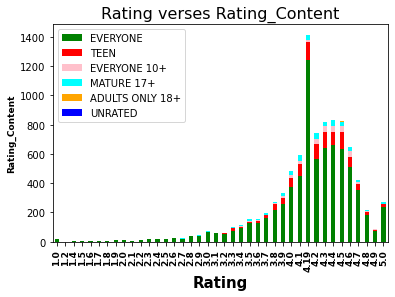

In [61]:
plt.figure(figsize =(15,15))
rating_content.set_index('Rating')[:20].plot(kind='bar', stacked=True, color=['green', 'red','pink','cyan', 'orange', 'blue'])
plt.title('Rating verses Rating_Content', fontsize=16)
plt.xlabel('Rating',fontweight = 'heavy', fontsize = 15)
plt.ylabel('Rating_Content',fontweight = 'heavy', fontsize = 9)
plt.xticks(rotation=90,fontweight = 'heavy', fontsize = 9)

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='App'>

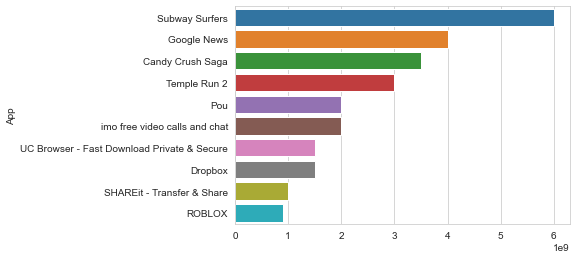

In [62]:
#Most installed apps

sns.set_style("whitegrid")
x= app_store_df.groupby("App").Installs.sum().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)




/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='App'>

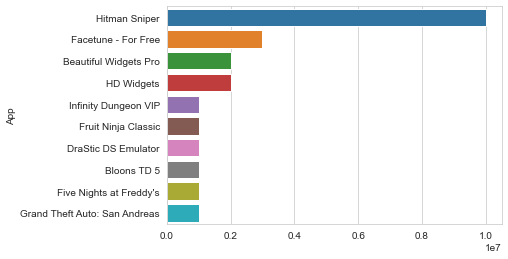

In [63]:
#Top paid apps
x= app_store_df[app_store_df["Type"]=="Paid"]
y= x.groupby("App").Installs.sum().sort_values(ascending= False).head(10)
sns.barplot(y.values,y.index)

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='App'>

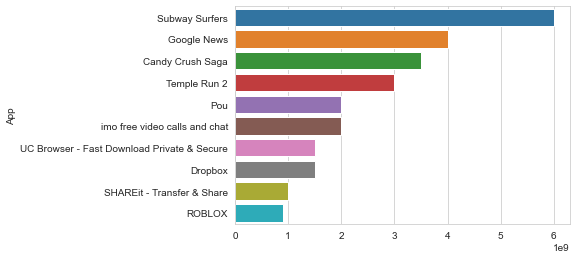

In [64]:
x=app_store_df[app_store_df["Type"]=="Free"]
y=x.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(y.values,y.index)

In [65]:
len(app_store_df["Genres"].unique())

117

In [66]:
app_store_df["Genres"].head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

In [67]:
app_store_df["Genres"] = app_store_df["Genres"].str.split(";").str[0]

In [68]:
len(app_store_df['Genres'].unique())

49

<function matplotlib.pyplot.show(close=None, block=None)>

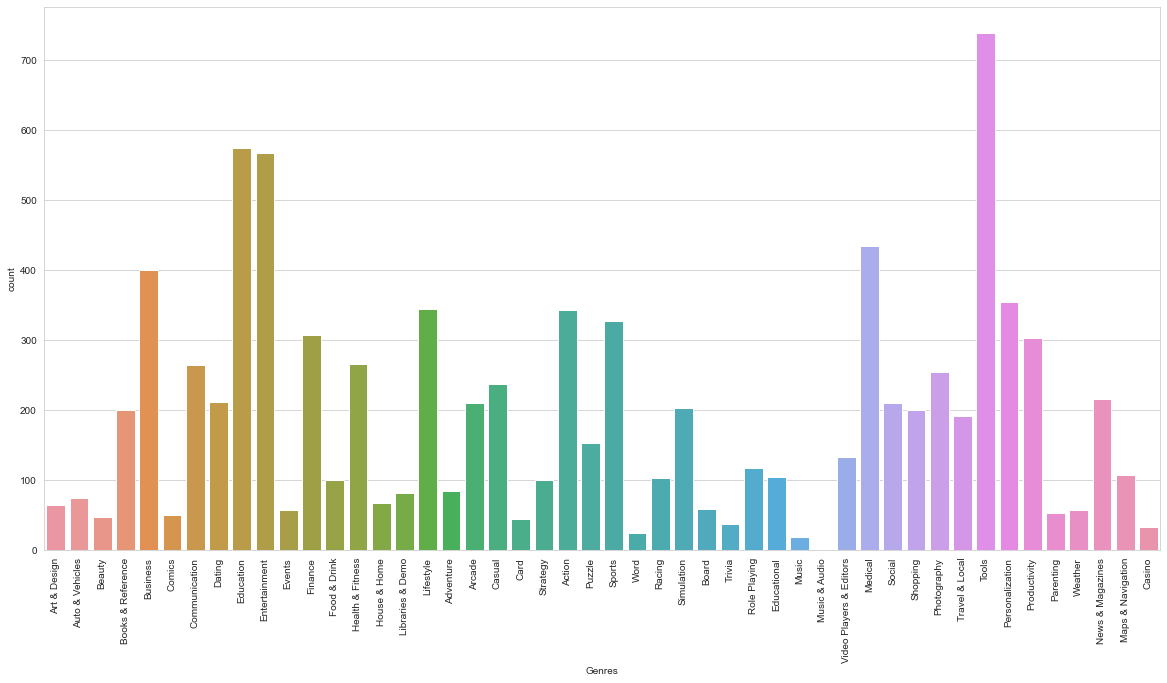

In [69]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="Genres",data=app_store_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show


In [70]:
app_store_df.groupby("Genres").Rating.mean().sort_values(ascending = False)

Genres
Word                       4.419600
Events                     4.382632
Art & Design               4.348615
Puzzle                     4.342549
Parenting                  4.318519
Music & Audio              4.300000
Board                      4.297797
Personalization            4.295915
Arcade                     4.295687
Education                  4.292174
Books & Reference          4.283800
Beauty                     4.270213
Role Playing               4.268974
Action                     4.265160
Casino                     4.264118
Strategy                   4.260297
Social                     4.246524
Weather                    4.235789
Shopping                   4.223781
Health & Fitness           4.219135
Adventure                  4.216353
Sports                     4.216086
Libraries & Demo           4.200000
Music                      4.188947
Medical                    4.185714
Racing                     4.178155
Casual                     4.173544
Simulation           

In [71]:
app_store_df.groupby("Category").Rating.mean().sort_values(ascending = False)

Category
EDUCATION              4.385495
EVENTS                 4.382632
ART_AND_DESIGN         4.352742
PARENTING              4.318519
PERSONALIZATION        4.295915
BOOKS_AND_REFERENCE    4.285127
BEAUTY                 4.270213
GAME                   4.266296
SOCIAL                 4.246524
WEATHER                4.235789
SHOPPING               4.223781
HEALTH_AND_FITNESS     4.218523
SPORTS                 4.201801
LIBRARIES_AND_DEMO     4.200000
FAMILY                 4.190202
MEDICAL                4.185714
HOUSE_AND_HOME         4.167353
AUTO_AND_VEHICLES      4.154400
PRODUCTIVITY           4.154191
NEWS_AND_MAGAZINES     4.153843
PHOTOGRAPHY            4.150079
BUSINESS               4.146900
ENTERTAINMENT          4.146667
COMICS                 4.132941
FINANCE                4.122443
COMMUNICATION          4.120604
FOOD_AND_DRINK         4.112400
LIFESTYLE              4.111739
TRAVEL_AND_LOCAL       4.067604
VIDEO_PLAYERS          4.044656
TOOLS                  4.036468

## Continuous EDA

In [72]:
app_store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
Size(MB)          float64
dtype: object

In [73]:
app_store_df

App        Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                    Coloring book moana  ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                  Sketch - Draw & Paint  ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
...                                                  ...             ...   
10836                                   Sya9a Maroc - FR          FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings          FAMILY   
10838                             Parkinson Exercices FR         MEDICAL   
10839                                                  0               0   
10840      iHoroscope - 2018 Daily Horoscope & Astrology       LIFESTYLE   

       Rating  Reviews     Size    Installs  Type  Price Content_Rating  \
0        4.10      159  19000.0     10000.0  Free    0.0       Everyone   
1        3.90      967  14000.0    500000.0  Free    0.0       Everyone   
2        4.70    87510      8.7   5000000.0  Free    0.0       Everyone   
3        4.50   215644  25000.0  50000000.0  Free    0.0           Teen   
4        4.30      967      2.8    100000.0  Free    0.0       Everyone   
...       ...      ...      ...         ...   ...    ...            ...   
10836    4.50       38  53000.0      5000.0  Free    0.0       Everyone   
10837    5.00        4      3.6       100.0  Free    0.0       Everyone   
10838    4.19        3      9.5      1000.0  Free    0.0       Everyone   
10839    0.00        0      0.0         0.0     0    0.0              0   
10840    4.50   398307  19000.0  10000000.0  Free    0.0       Everyone   

             Genres      Last_Updated         Current_Ver         Android_Ver  \
0      Art & Design   January 7, 2018               1.0.0        4.0.3 and up   
1      Art & Design  January 15, 2018               2.0.0        4.0.3 and up   
2      Art & Design    August 1, 2018               1.2.4        4.0.3 and up   
3      Art & Design      June 8, 2018  Varies with device          4.2 and up   
4      Art & Design     June 20, 2018                 1.1          4.4 and up   
...             ...               ...                 ...                 ...   
10836     Education     July 25, 2017                1.48          4.1 and up   
10837     Education      July 6, 2018                 1.0          4.1 and up   
10838       Medical  January 20, 2017                 1.0          2.2 and up   
10839           NaN                 0                   0                   0   
10840     Lifestyle     July 25, 2018  Varies with device  Varies with device   

       Size(MB)  
0          19.0  
1          14.0  
2           8.7  
3          25.0  
4           2.8  
...         ...  
10836      53.0  
10837       3.6  
10838       9.5  
10839       0.0  
10840      19.0  

[10840 rows x 14 columns]

In [74]:
app_store_df['Last_Updated'] = pd.to_datetime(app_store_df['Last_Updated'])
app_store_df['Last_Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   1970-01-01
10840   2018-07-25
Name: Last_Updated, Length: 10840, dtype: datetime64[ns]

In [75]:
app_store_df['Updated_Day']=app_store_df['Last_Updated'].dt.day
app_store_df['Updated_Month']=app_store_df['Last_Updated'].dt.month
app_store_df['Updated_Year']=app_store_df['Last_Updated'].dt.year

In [76]:
app_store_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size    Installs  Type  Price Content_Rating        Genres  \
0      159  19000.0     10000.0  Free    0.0       Everyone  Art & Design   
1      967  14000.0    500000.0  Free    0.0       Everyone  Art & Design   
2    87510      8.7   5000000.0  Free    0.0       Everyone  Art & Design   
3   215644  25000.0  50000000.0  Free    0.0           Teen  Art & Design   
4      967      2.8    100000.0  Free    0.0       Everyone  Art & Design   

  Last_Updated         Current_Ver   Android_Ver  Size(MB)  Updated_Day  \
0   2018-01-07               1.0.0  4.0.3 and up      19.0            7   
1   2018-01-15               2.0.0  4.0.3 and up      14.0           15   
2   2018-08-01               1.2.4  4.0.3 and up       8.7            1   
3   2018-06-08  Varies with device    4.2 and up      25.0            8   
4   2018-06-20                 1.1    4.4 and up       2.8           20   

   Updated_Month  Updated_Year  
0              1          2018  
1              1          2018  
2              8          2018  
3              6          2018  
4              6          2018

In [77]:
store_cont_df = pd.DataFrame(app_store_df, columns=['Rating', 'Reviews', 'Size', 'Installs', 'Price'])
store_cont_df.head()

Rating  Reviews     Size    Installs  Price
0     4.1      159  19000.0     10000.0    0.0
1     3.9      967  14000.0    500000.0    0.0
2     4.7    87510      8.7   5000000.0    0.0
3     4.5   215644  25000.0  50000000.0    0.0
4     4.3      967      2.8    100000.0    0.0

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


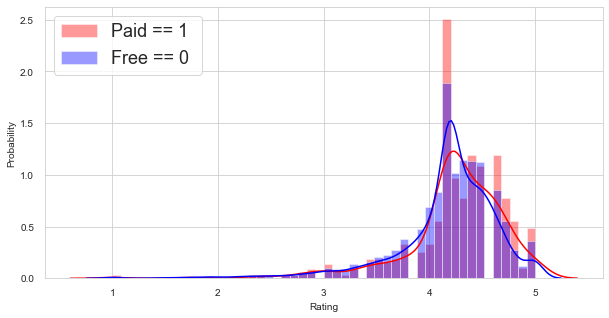

In [78]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(figsize =(10,5))
type = app_store_df.loc[:,['Rating', 'Type']]

type1 = type[type['Type'] == 'Paid']['Rating']


type0 = type[type['Type'] =='Free']['Rating']


sns.distplot(type1.values, label = 'Paid == 1 ', color = 'red')
sns.distplot(type0.values, label = 'Free == 0 ', color = 'b')

ax.legend(loc ='upper left', fontsize =18)
ax.set_xlabel('Rating')
ax.set_ylabel('Probability')

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='black')
ax.grid( True)

In [79]:
app_store_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size    Installs  Type  Price Content_Rating        Genres  \
0      159  19000.0     10000.0  Free    0.0       Everyone  Art & Design   
1      967  14000.0    500000.0  Free    0.0       Everyone  Art & Design   
2    87510      8.7   5000000.0  Free    0.0       Everyone  Art & Design   
3   215644  25000.0  50000000.0  Free    0.0           Teen  Art & Design   
4      967      2.8    100000.0  Free    0.0       Everyone  Art & Design   

  Last_Updated         Current_Ver   Android_Ver  Size(MB)  Updated_Day  \
0   2018-01-07               1.0.0  4.0.3 and up      19.0            7   
1   2018-01-15               2.0.0  4.0.3 and up      14.0           15   
2   2018-08-01               1.2.4  4.0.3 and up       8.7            1   
3   2018-06-08  Varies with device    4.2 and up      25.0            8   
4   2018-06-20                 1.1    4.4 and up       2.8           20   

   Updated_Month  Updated_Year  
0              1          2018  
1              1          2018  
2              8          2018  
3              6          2018  
4              6          2018

In [80]:
yearmorethan2011 = []
for i in app_store_df['Updated_Year']:
    if i >=2012:
        yearmorethan2011.append(i)


<function matplotlib.pyplot.show(close=None, block=None)>

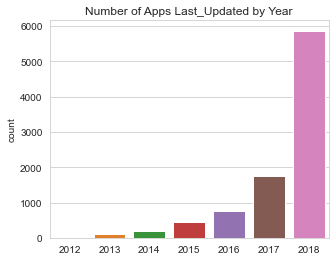

In [81]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x=yearmorethan2011,data=app_store_df)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Number of Apps Last_Updated by Year')
plt.show

In [82]:
#Checking the shape of each dataframe
app_store_df[app_store_df['Rating'] >= 4].shape

(7344, 17)

In [83]:
app_store_df[(app_store_df['Rating'] < 4) & (app_store_df['Rating'] > 3 )].shape

(1449, 17)

In [84]:
app_store_df[app_store_df['Rating'] <=3].shape

(2047, 17)

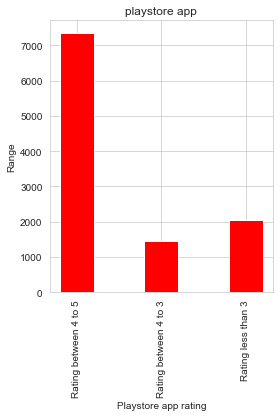

In [85]:

data = {'Rating between 4 to 5':7344, 'Rating between 4 to 3':1449, 'Rating less than 3':2047,
		}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (4, 5))

# creating the bar plot
plt.bar(courses, values, color ='red',
		width =0.4)

plt.xlabel("Playstore app rating")
plt.ylabel("Range")
plt.title("playstore app")
plt.xticks(rotation=90)
plt.show()

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


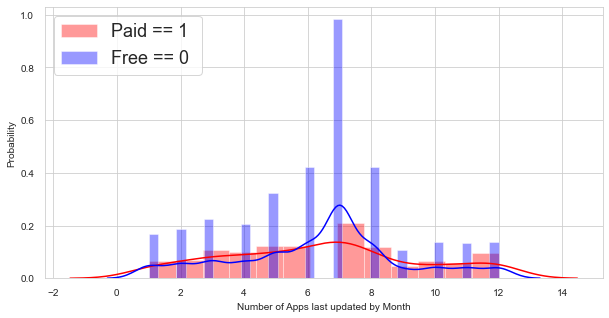

In [86]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(figsize =(10,5))
type = app_store_df.loc[:,['Updated_Month', 'Type']]

type1 = type[type['Type'] == 'Paid']['Updated_Month']


type0 = type[type['Type'] =='Free']['Updated_Month']


sns.distplot(type1.values, label = 'Paid == 1 ', color = 'red')
sns.distplot(type0.values, label = 'Free == 0 ', color = 'b')

ax.legend(loc ='upper left', fontsize =18)
ax.set_xlabel('Number of Apps last updated by Month')
ax.set_ylabel('Probability')

ax.xaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='black')
ax.grid( True)

- From above, we see that majority of Apps are Free, however, there are some exceptions of Apps costing over 50USD and some up till 400USD
- To better visualise on the Price(USD) of Apps, we narrow down to viewing Apps costing less than 10USD.

In [87]:
pricelessthanten = []
for i in store_cont_df['Price']:
    if i <=10 and i >0:
        pricelessthanten.append(i)


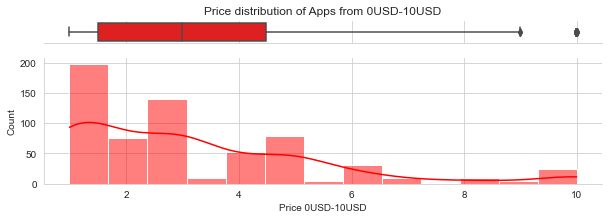

<Figure size 432x288 with 0 Axes>

In [88]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(2,
                           figsize=(10, 3),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})
    

ax_box = ax[0]
sns.boxplot(x=pricelessthanten, ax=ax_box, color ='red')
ax_box.set(title='Price distribution of Apps from 0USD-10USD', yticks=[], xlabel='')
sns.despine(ax=ax_box, left=True)

ax_hist = ax[1]
ax_hist = sns.histplot(pricelessthanten, ax=ax_hist, kde =True, color ='red')
ax_hist.set(xlabel='Price 0USD-10USD')
sns.despine(ax=ax_hist)

ax_hist.xaxis.set_minor_locator(AutoMinorLocator())

plt.show()
plt.tight_layout()

In [89]:
pricemorethanten = []
for i in store_cont_df['Price']:
    if i >10:
        pricemorethanten.append(i)

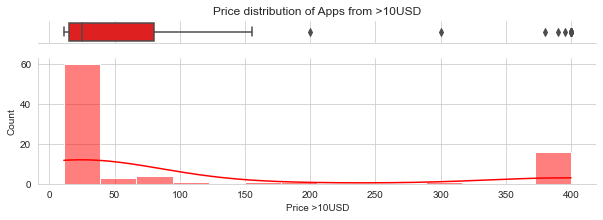

<Figure size 432x288 with 0 Axes>

In [90]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(2,
                           figsize=(10, 3),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})
    

ax_box = ax[0]
sns.boxplot(x=pricemorethanten, ax=ax_box, color ='red')
ax_box.set(title='Price distribution of Apps from >10USD', yticks=[], xlabel='')
sns.despine(ax=ax_box, left=True)

ax_hist = ax[1]
ax_hist = sns.histplot(pricemorethanten, ax=ax_hist, kde =True, color ='red')
ax_hist.set(xlabel='Price >10USD')
sns.despine(ax=ax_hist)

ax_hist.xaxis.set_minor_locator(AutoMinorLocator())

plt.show()
plt.tight_layout()

#### from above, lets investigate what are the apps costing above USD 40 ?

In [91]:
print('Number of apps more than 40USD: ', len(store_cont_df.loc[store_cont_df['Price']>40]))

Number of apps more than 40USD:  25


In [92]:
len(store_cont_df['Price'])

10840

##### From above, it looks like the apps costing above USD40 are scam meme apps (not serious apps), before considering whether to remove these apps, we check the number of apps costing above USD 40.

In [93]:
print('Number of apps with price higher than USD40: ', len(app_store_df.loc[app_store_df['Price']>40]))

Number of apps with price higher than USD40:  25


In [94]:
app_store_df['Price'].shape

(10840,)

In [95]:
dfa = app_store_df.groupby(['Category' ,'App'])['Installs'].sum().reset_index()

dfa = dfa.sort_values('Installs', ascending = False)

dftop = dfa[dfa.Installs >= 600000000 ]


dftop.style.set_properties(**{'background-color': 'salmon',
                            'color': 'black',
                            'border-color': 'white'})

In [96]:
dfa = app_store_df.groupby(['Category' ,'App'])['Price'].sum().reset_index()

dfa = dfa.sort_values('Price', ascending = False)

dftop = dfa[dfa.Price <= 10].head(20)


dftop.style.set_properties(**{'background-color': 'salmon',
                            'color': 'black',
                            'border-color': 'white'})

In [97]:
dfa = app_store_df.groupby(['Category' ,'App'])['Price'].sum().reset_index()

dfa = dfa.sort_values('Price', ascending = False)

dftop = dfa[dfa.Price <= 2].head(20)


dftop.style.set_properties(**{'background-color': 'lightblue',
                            'color': 'black',
                            'border-color': 'white'})

## Data Transformation (Transform Ordinal Data type)

In [98]:
app_store_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
Size(MB)                 float64
Updated_Day                int64
Updated_Month              int64
Updated_Year               int64
dtype: object

In [99]:
app_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content_Rating  10840 non-null  object        
 9   Genres          9145 non-null   object        
 10  Last_Updated    10840 non-null  datetime64[ns]
 11  Current_Ver     10832 non-null  object        
 12  Android_Ver     10838 non-null  object        
 13  Size(MB)        10840 non-null  float64       
 14  Updated_Day     10840 non-null  int64         
 15  Up

In [100]:
app_store_df.drop(labels =['Current_Ver', 'Android_Ver', 'App','Size'], axis =1, inplace=True)

<AxesSubplot:>

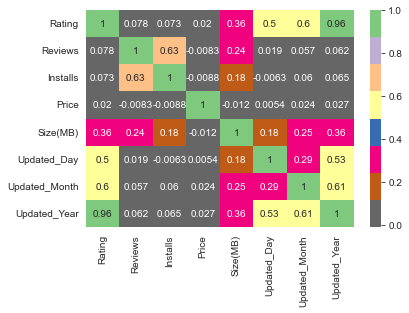

In [101]:
sns.heatmap(app_store_df.corr(),annot=True,cmap='Accent_r')

<AxesSubplot:>

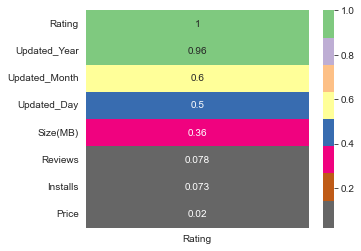

In [102]:
fig, ax = plt.subplots(figsize=(5,4)) 
sns.heatmap(app_store_df.corr()[['Rating']].sort_values(by=['Rating'],ascending=False),annot=True,cmap='Accent_r')

In [103]:
app_store_df

Category  Rating  Reviews    Installs  Type  Price  \
0      ART_AND_DESIGN    4.10      159     10000.0  Free    0.0   
1      ART_AND_DESIGN    3.90      967    500000.0  Free    0.0   
2      ART_AND_DESIGN    4.70    87510   5000000.0  Free    0.0   
3      ART_AND_DESIGN    4.50   215644  50000000.0  Free    0.0   
4      ART_AND_DESIGN    4.30      967    100000.0  Free    0.0   
...               ...     ...      ...         ...   ...    ...   
10836          FAMILY    4.50       38      5000.0  Free    0.0   
10837          FAMILY    5.00        4       100.0  Free    0.0   
10838         MEDICAL    4.19        3      1000.0  Free    0.0   
10839               0    0.00        0         0.0     0    0.0   
10840       LIFESTYLE    4.50   398307  10000000.0  Free    0.0   

      Content_Rating        Genres Last_Updated  Size(MB)  Updated_Day  \
0           Everyone  Art & Design   2018-01-07      19.0            7   
1           Everyone  Art & Design   2018-01-15      14.0           15   
2           Everyone  Art & Design   2018-08-01       8.7            1   
3               Teen  Art & Design   2018-06-08      25.0            8   
4           Everyone  Art & Design   2018-06-20       2.8           20   
...              ...           ...          ...       ...          ...   
10836       Everyone     Education   2017-07-25      53.0           25   
10837       Everyone     Education   2018-07-06       3.6            6   
10838       Everyone       Medical   2017-01-20       9.5           20   
10839              0           NaN   1970-01-01       0.0            1   
10840       Everyone     Lifestyle   2018-07-25      19.0           25   

       Updated_Month  Updated_Year  
0                  1          2018  
1                  1          2018  
2                  8          2018  
3                  6          2018  
4                  6          2018  
...              ...           ...  
10836              7          2017  
10837              7          2018  
10838              1          2017  
10839              1          1970  
10840              7          2018  

[10840 rows x 13 columns]

In [104]:
#len(app_store_df.loc[app_store_df['Installs']>40000000])
#len(app_store_df.loc[app_store_df['Installs']>0])
#selRows = app_store_df[app_store_df['Installs'] > 40000000].index
#app_store_df = app_store_df.drop(selRows, axis=0)
#sns.boxplot(x=app_store_df["Installs"])


# Convert Categorial Variables to numeric 

## Data Transformation (Transform Categorial Data Type, using LabelEncoder, which does not have a hierachy)

In [105]:
#Check number of unique classes in object types in each category
app_store_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Category          34
Type               3
Content_Rating     7
Genres            48
dtype: int64

In [106]:
category = app_store_df['Category'].unique().tolist()
#category = ['cat_' + word for word in category]
app_store_df = pd.concat([app_store_df, pd.get_dummies(app_store_df['Category'], prefix = 'cat')], axis = 1)

In [107]:
app_store_df.head()

Category  Rating  Reviews    Installs  Type  Price Content_Rating  \
0  ART_AND_DESIGN     4.1      159     10000.0  Free    0.0       Everyone   
1  ART_AND_DESIGN     3.9      967    500000.0  Free    0.0       Everyone   
2  ART_AND_DESIGN     4.7    87510   5000000.0  Free    0.0       Everyone   
3  ART_AND_DESIGN     4.5   215644  50000000.0  Free    0.0           Teen   
4  ART_AND_DESIGN     4.3      967    100000.0  Free    0.0       Everyone   

         Genres Last_Updated  Size(MB)  ...  cat_PERSONALIZATION  \
0  Art & Design   2018-01-07      19.0  ...                    0   
1  Art & Design   2018-01-15      14.0  ...                    0   
2  Art & Design   2018-08-01       8.7  ...                    0   
3  Art & Design   2018-06-08      25.0  ...                    0   
4  Art & Design   2018-06-20       2.8  ...                    0   

   cat_PHOTOGRAPHY  cat_PRODUCTIVITY  cat_SHOPPING  cat_SOCIAL  cat_SPORTS  \
0                0                 0             0           0           0   
1                0                 0             0           0           0   
2                0                 0             0           0           0   
3                0                 0             0           0           0   
4                0                 0             0           0           0   

   cat_TOOLS  cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS  cat_WEATHER  
0          0                     0                  0            0  
1          0                     0                  0            0  
2          0                     0                  0            0  
3          0                     0                  0            0  
4          0                     0                  0            0  

[5 rows x 47 columns]

In [108]:
#Label Encode 'Genres'
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
app_store_df['Genres'] = le.fit_transform(app_store_df['Genres'])
app_store_df['Genres']

0         3
1         3
2         3
3         3
4         3
         ..
10836    15
10837    15
10838    26
10839    48
10840    24
Name: Genres, Length: 10840, dtype: int64

In [109]:
app_store_df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 0, 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [110]:
import statistics
statistics.mode(app_store_df['Content_Rating'])

'Everyone'

In [111]:
app_store_df['Content_Rating'] = app_store_df['Content_Rating'].replace(0, 'Everyone')

In [112]:
app_store_df['Content_Rating'] = app_store_df['Content_Rating'].replace(np.nan, 'Unrated')

In [113]:
le = preprocessing.LabelEncoder()
app_store_df['Content_Rating'] = le.fit_transform(app_store_df['Content_Rating'])

In [114]:
app_store_df=pd.concat([app_store_df, pd.get_dummies(app_store_df['Type'])], axis=1)

In [115]:
app_store_df['new'] = pd.to_datetime(app_store_df['Last_Updated'])
app_store_df['lastupdate'] = (app_store_df['new'] - app_store_df['new'].max()).dt.days

In [116]:
app_store_df

Category  Rating  Reviews    Installs  Type  Price  \
0      ART_AND_DESIGN    4.10      159     10000.0  Free    0.0   
1      ART_AND_DESIGN    3.90      967    500000.0  Free    0.0   
2      ART_AND_DESIGN    4.70    87510   5000000.0  Free    0.0   
3      ART_AND_DESIGN    4.50   215644  50000000.0  Free    0.0   
4      ART_AND_DESIGN    4.30      967    100000.0  Free    0.0   
...               ...     ...      ...         ...   ...    ...   
10836          FAMILY    4.50       38      5000.0  Free    0.0   
10837          FAMILY    5.00        4       100.0  Free    0.0   
10838         MEDICAL    4.19        3      1000.0  Free    0.0   
10839               0    0.00        0         0.0     0    0.0   
10840       LIFESTYLE    4.50   398307  10000000.0  Free    0.0   

       Content_Rating  Genres Last_Updated  Size(MB)  ...  cat_SPORTS  \
0                   1       3   2018-01-07      19.0  ...           0   
1                   1       3   2018-01-15      14.0  ...           0   
2                   1       3   2018-08-01       8.7  ...           0   
3                   4       3   2018-06-08      25.0  ...           0   
4                   1       3   2018-06-20       2.8  ...           0   
...               ...     ...          ...       ...  ...         ...   
10836               1      15   2017-07-25      53.0  ...           0   
10837               1      15   2018-07-06       3.6  ...           0   
10838               1      26   2017-01-20       9.5  ...           0   
10839               1      48   1970-01-01       0.0  ...           0   
10840               1      24   2018-07-25      19.0  ...           0   

       cat_TOOLS  cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS  cat_WEATHER  0  \
0              0                     0                  0            0  0   
1              0                     0                  0            0  0   
2              0                     0                  0            0  0   
3              0                     0                  0            0  0   
4              0                     0                  0            0  0   
...          ...                   ...                ...          ... ..   
10836          0                     0                  0            0  0   
10837          0                     0                  0            0  0   
10838          0                     0                  0            0  0   
10839          0                     0                  0            0  1   
10840          0                     0                  0            0  0   

       Free  Paid        new  lastupdate  
0         1     0 2018-01-07        -213  
1         1     0 2018-01-15        -205  
2         1     0 2018-08-01          -7  
3         1     0 2018-06-08         -61  
4         1     0 2018-06-20         -49  
...     ...   ...        ...         ...  
10836     1     0 2017-07-25        -379  
10837     1     0 2018-07-06         -33  
10838     1     0 2017-01-20        -565  
10839     0     0 1970-01-01      -17751  
10840     1     0 2018-07-25         -14  

[10840 rows x 52 columns]

<AxesSubplot:>

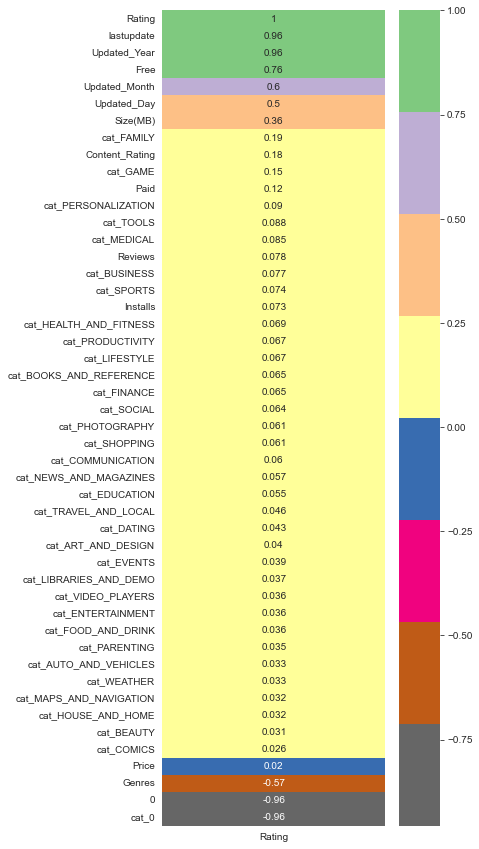

In [117]:
fig, ax = plt.subplots(figsize=(5,15)) 
sns.heatmap(app_store_df.corr()[['Rating']].sort_values(by=['Rating'],ascending=False),annot=True,cmap='Accent_r')

<AxesSubplot:>

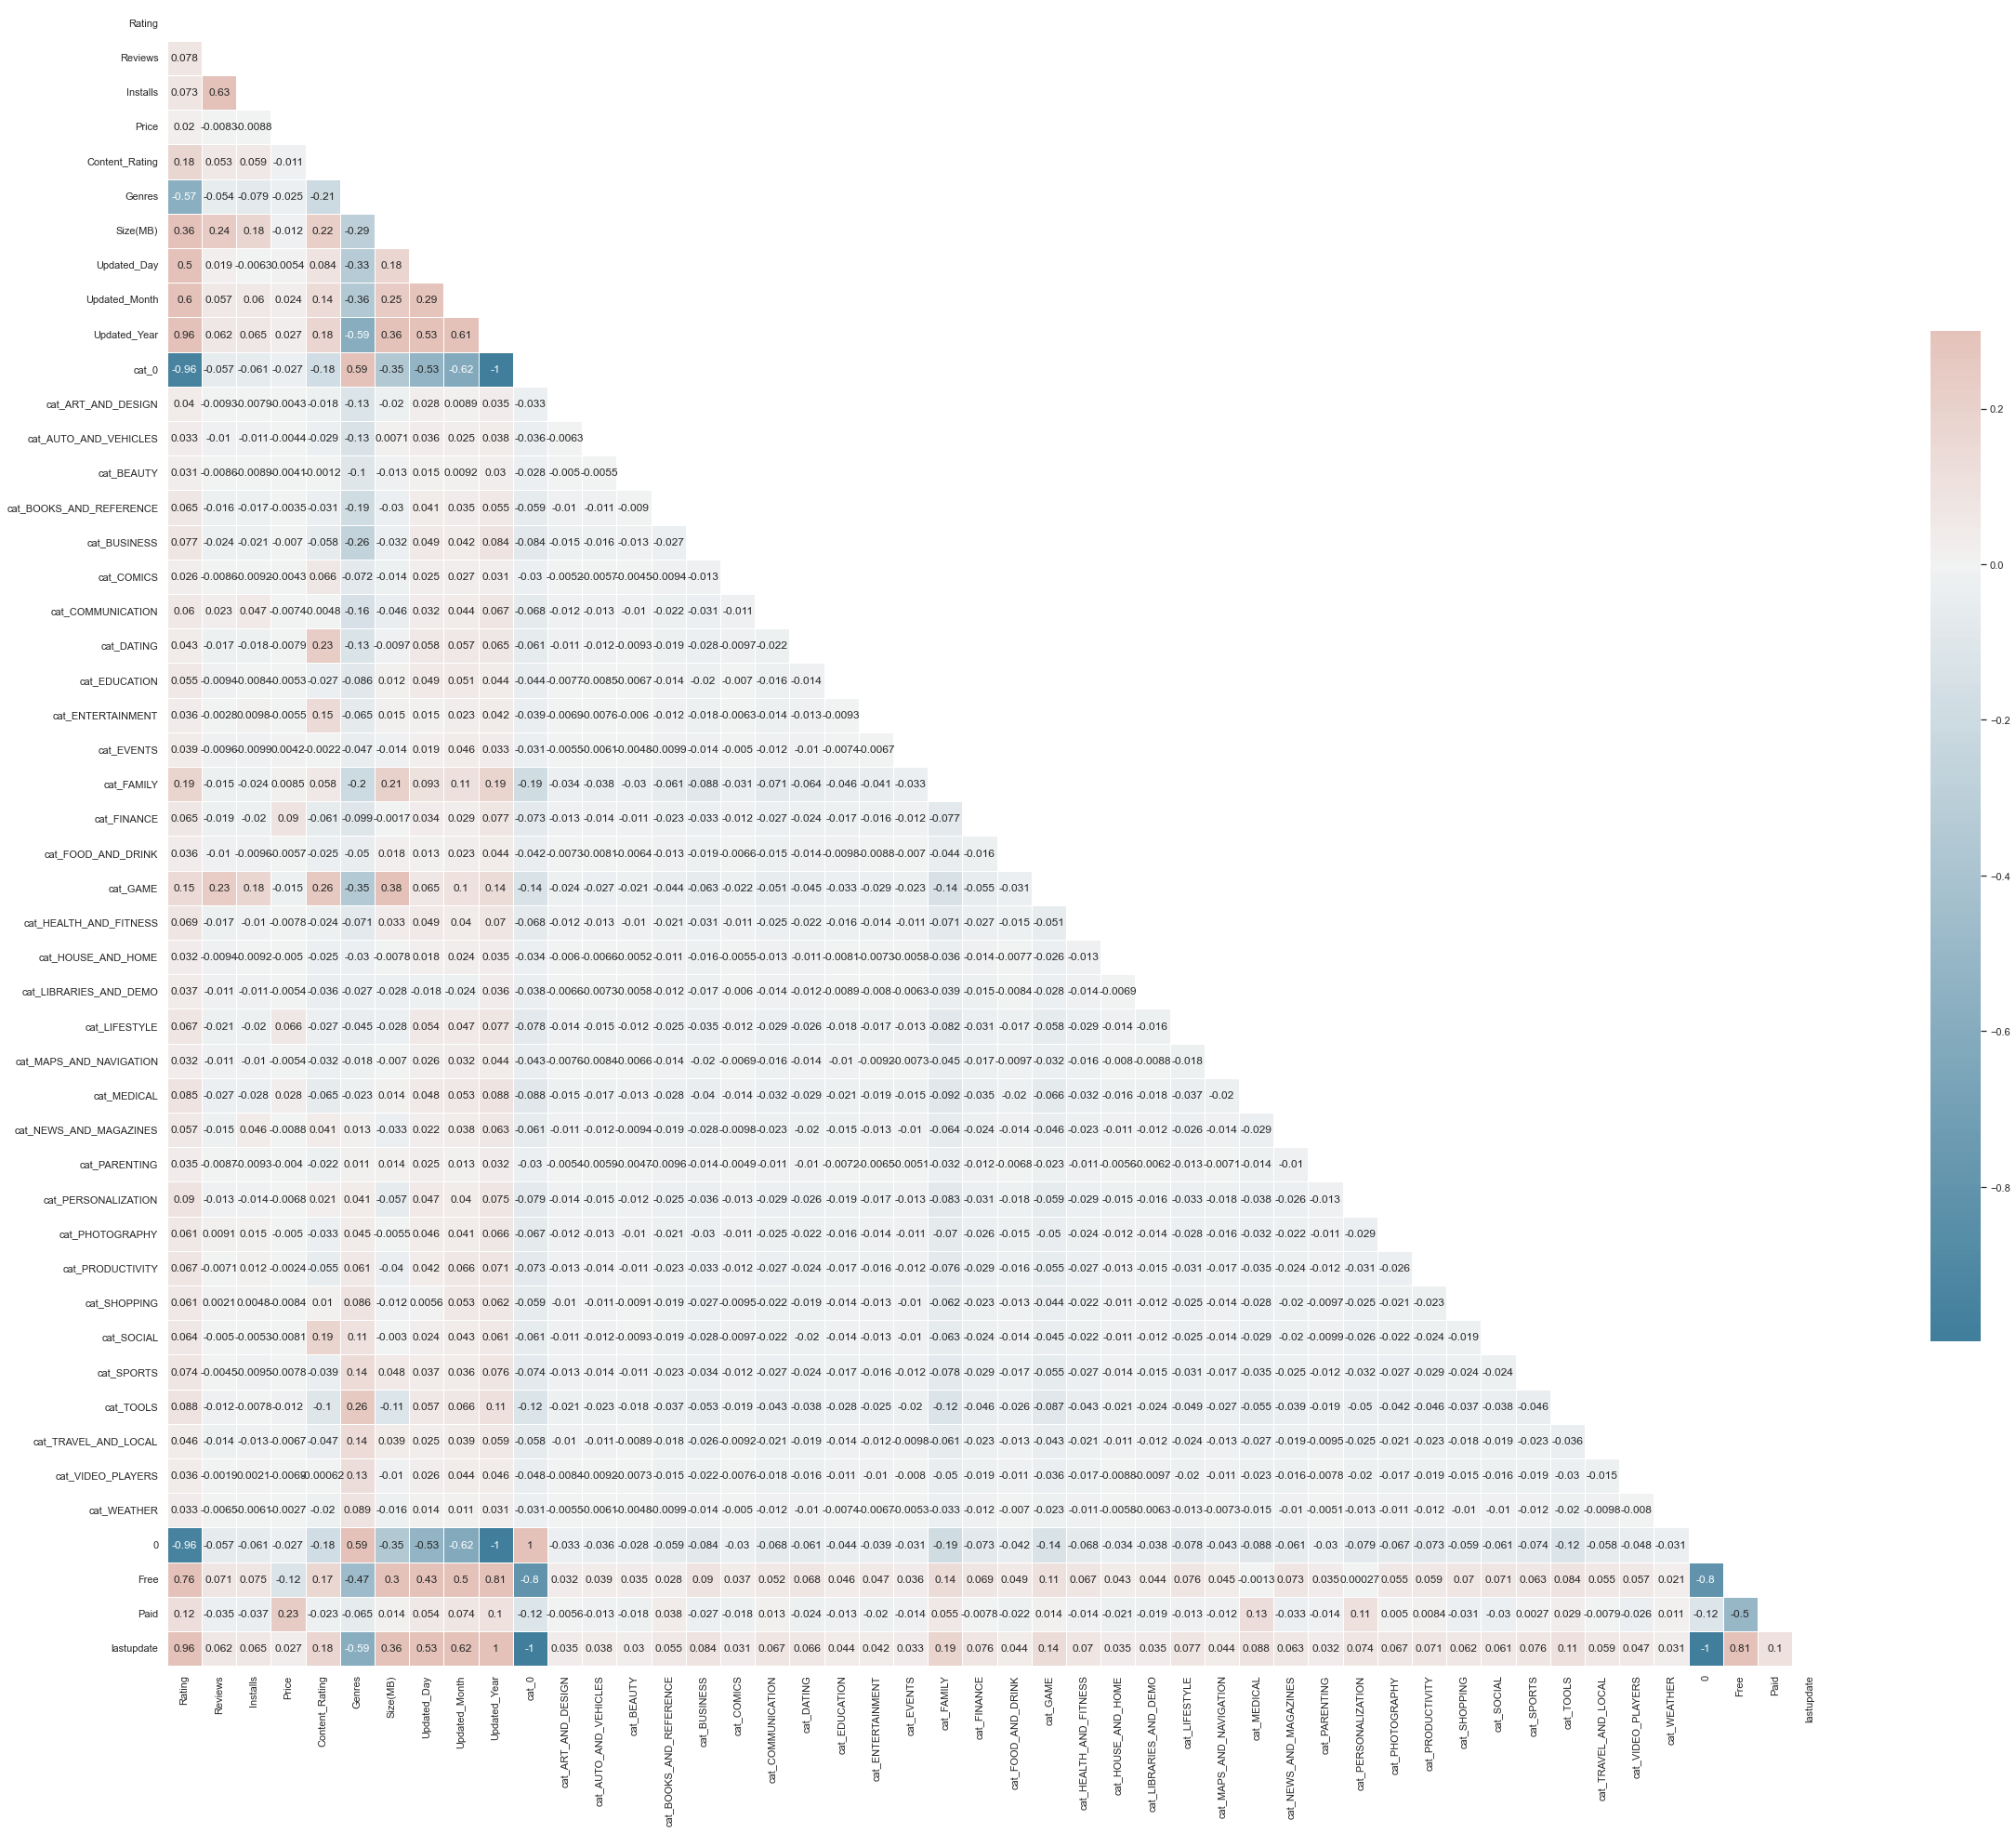

In [118]:
# selected_train_df dataframe correlation 

sns.set_theme(style="white")


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(app_store_df.corr(), dtype = bool))  

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(app_store_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)

In [119]:
X_two = app_store_df[['Size(MB)', 'Free']].values.reshape(-1,2)
y_two = app_store_df['Rating']

In [120]:
x_train_two, x_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, test_size = 0.30, random_state = 42)

In [121]:
ss = StandardScaler()
x_train_two_sc = ss.fit_transform(x_train_two)
x_test_two_sc = ss.transform(x_test_two)

In [122]:
two_lr = LinearRegression()
data_model =two_lr.fit(x_train_two_sc, y_train_two)

In [123]:
print(f'the Trained on Size and whether is Free on LinearRegression is {two_lr.score(x_train_two_sc, y_train_two)}') 
print(f'the Test on Size and whether is Free on LinearRegression is {two_lr.score(x_test_two_sc, y_test_two)}') 

the Trained on Size and whether is Free on LinearRegression is 0.600402194681677
the Test on Size and whether is Free on LinearRegression is 0.5982492960916799


In [124]:
Y= two_lr.score(x_test_two_sc, y_test_two)
Y

0.5982492960916799

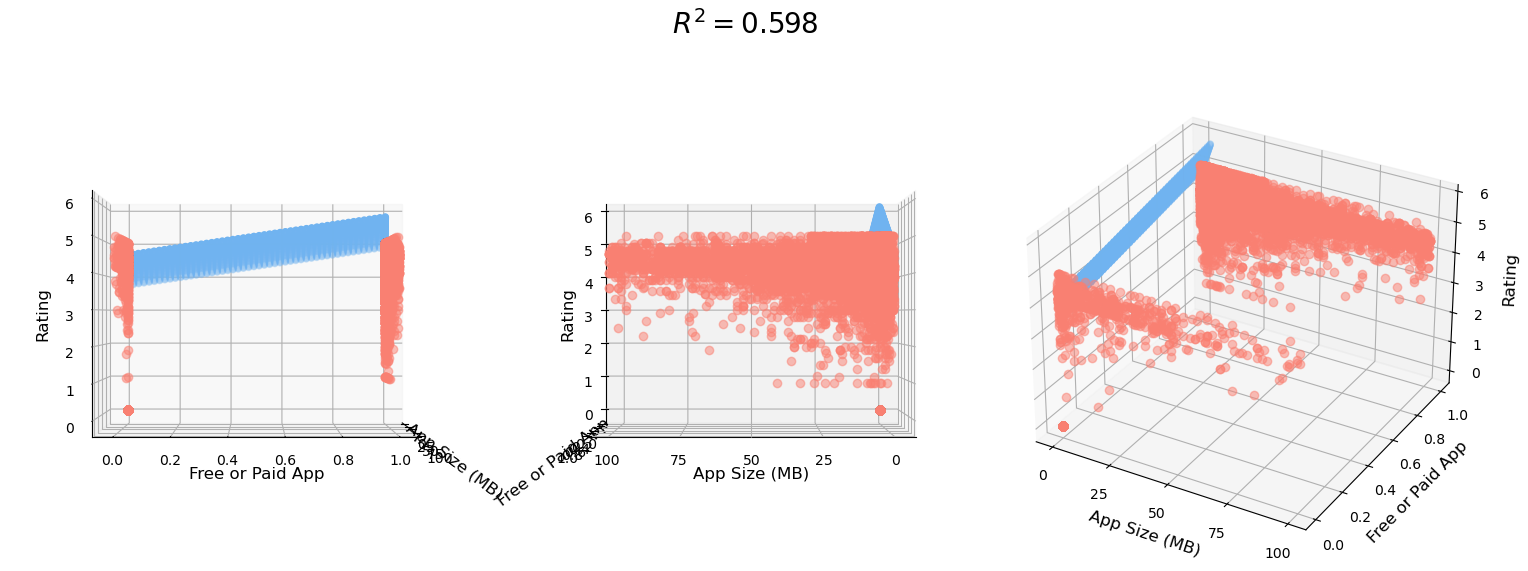

In [125]:
x1 = X_two[:, 0]
x2 = X_two[:, 1]
z = app_store_df['Rating']
x_tr = np.linspace(1, 5, 50)   # range of engine*max_power, number of datapoints 
y_tr = np.linspace(0, 1, 50)  # range of max_power, number of datapoints
xx_tr, yy_tr = np.meshgrid(x_tr, y_tr)
model_viz = np.array([xx_tr.flatten(), yy_tr.flatten()]).T
y_pred = two_lr.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x1, x2, z, color='salmon', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_tr.flatten(), yy_tr.flatten(), y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('App Size (MB)', fontsize=12)
    ax.set_ylabel('Free or Paid App', fontsize=12)
    ax.set_zlabel('Rating', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=0, azim=0)
ax2.view_init(elev=0, azim=90)

fig.suptitle('$R^2 = %.3f$' % Y, fontsize=20)

fig.tight_layout()

## Data Modelling and Correlation

In [126]:
app_store_df.dtypes

Category                           object
Rating                            float64
Reviews                             int64
Installs                          float64
Type                               object
Price                             float64
Content_Rating                      int64
Genres                              int64
Last_Updated               datetime64[ns]
Size(MB)                          float64
Updated_Day                         int64
Updated_Month                       int64
Updated_Year                        int64
cat_0                               uint8
cat_ART_AND_DESIGN                  uint8
cat_AUTO_AND_VEHICLES               uint8
cat_BEAUTY                          uint8
cat_BOOKS_AND_REFERENCE             uint8
cat_BUSINESS                        uint8
cat_COMICS                          uint8
cat_COMMUNICATION                   uint8
cat_DATING                          uint8
cat_EDUCATION                       uint8
cat_ENTERTAINMENT                 

In [127]:
X = app_store_df.drop(labels=["Rating", "Category", "Last_Updated","Type","new"], axis = 1)
y = app_store_df['Rating']

In [128]:
X

Reviews    Installs  Price  Content_Rating  Genres  Size(MB)  \
0          159     10000.0    0.0               1       3      19.0   
1          967    500000.0    0.0               1       3      14.0   
2        87510   5000000.0    0.0               1       3       8.7   
3       215644  50000000.0    0.0               4       3      25.0   
4          967    100000.0    0.0               1       3       2.8   
...        ...         ...    ...             ...     ...       ...   
10836       38      5000.0    0.0               1      15      53.0   
10837        4       100.0    0.0               1      15       3.6   
10838        3      1000.0    0.0               1      26       9.5   
10839        0         0.0    0.0               1      48       0.0   
10840   398307  10000000.0    0.0               1      24      19.0   

       Updated_Day  Updated_Month  Updated_Year  cat_0  ...  cat_SOCIAL  \
0                7              1          2018      0  ...           0   
1               15              1          2018      0  ...           0   
2                1              8          2018      0  ...           0   
3                8              6          2018      0  ...           0   
4               20              6          2018      0  ...           0   
...            ...            ...           ...    ...  ...         ...   
10836           25              7          2017      0  ...           0   
10837            6              7          2018      0  ...           0   
10838           20              1          2017      0  ...           0   
10839            1              1          1970      1  ...           0   
10840           25              7          2018      0  ...           0   

       cat_SPORTS  cat_TOOLS  cat_TRAVEL_AND_LOCAL  cat_VIDEO_PLAYERS  \
0               0          0                     0                  0   
1               0          0                     0                  0   
2               0          0                     0                  0   
3               0          0                     0                  0   
4               0          0                     0                  0   
...           ...        ...                   ...                ...   
10836           0          0                     0                  0   
10837           0          0                     0                  0   
10838           0          0                     0                  0   
10839           0          0                     0                  0   
10840           0          0                     0                  0   

       cat_WEATHER  0  Free  Paid  lastupdate  
0                0  0     1     0        -213  
1                0  0     1     0        -205  
2                0  0     1     0          -7  
3                0  0     1     0         -61  
4                0  0     1     0         -49  
...            ... ..   ...   ...         ...  
10836            0  0     1     0        -379  
10837            0  0     1     0         -33  
10838            0  0     1     0        -565  
10839            0  1     0     0      -17751  
10840            0  0     1     0         -14  

[10840 rows x 47 columns]

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [130]:
ss = StandardScaler()
x_train_sc = ss.fit_transform(x_train)
x_test_sc = ss.transform(x_test)

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [131]:
multiple_lr = LinearRegression()
data_model = multiple_lr.fit(x_train_sc, y_train)

In [132]:

print(data_model.intercept_)
print(data_model.coef_)

3.525574910703749
[ 2.73240783e-02 -2.36385431e-03 -1.15850235e-02  2.58502679e-03
  1.12727998e-02 -1.72380068e-03  2.98670715e-01  2.91502576e+00
  1.91668814e+02  5.08167433e+11  2.45287509e+11  2.89394132e+11
  2.21648969e+11  4.83708673e+11  6.68411628e+11  2.45287509e+11
  5.24487567e+11  4.74126889e+11  3.29848676e+11  3.25076334e+11
  2.48477560e+11  1.30609202e+12  5.72649047e+11  3.32208193e+11
  9.99070875e+11  5.38736206e+11  2.69731916e+11  2.94764709e+11
  5.95736168e+11  3.36875783e+11  6.88916426e+11  4.85285732e+11
  2.45287509e+11  6.13015429e+11  5.15729950e+11  5.72649047e+11
  4.99236232e+11  4.88423285e+11  5.76569288e+11  8.86477010e+11
  4.64331169e+11  3.69938360e+11  2.63837994e+11 -2.07697429e+12
 -3.24087713e+12 -1.93755004e+12 -1.92539681e+02]


In [133]:
print(f'the Trained multiple LinearRegression is {multiple_lr.score(x_train_sc, y_train)}') 
print(f'the Test multiple LinearRegression is {multiple_lr.score(x_test_sc, y_test)}') 


the Trained multiple LinearRegression is 0.9187777921965383
the Test multiple LinearRegression is 0.92240478645979


In [134]:
lr_feature=app_store_df[['lastupdate', 'Free', 'Size(MB)', 'Content_Rating', 'Paid', 'Reviews', 'Installs', 'Price', 'Genres']]

In [135]:
app_store_df['lastupdate'].dtype

dtype('int64')

## KNN

In [136]:
knn = KNeighborsRegressor(n_neighbors = 25)
knn.fit(x_train_sc, y_train)

KNeighborsRegressor(n_neighbors=25)

In [137]:
print(f'The trained KNN score is :{knn.score(x_train_sc, y_train)}') 
print(f'The test KNN score is :{knn.score(x_test_sc, y_test)}') 


The trained KNN score is :0.9218905399758998
The test KNN score is :0.9211221653851226


#### Effect of number of neighbors K

In [138]:
train_score = []
test_score = []


for k in range(1,45):
    knn_determine = KNeighborsRegressor(n_neighbors=k)
    #X axis
    #train_cvs = cross_val_score(knn_determine, X_train_sc,y_train, cv=7).mean()
    #train_score.append(train_cvs)
    # y axis
    knn_determine.fit(x_train_sc,y_train)
    train_scoring = knn_determine.score(x_train_sc,y_train)
    test_scoring = knn_determine.score(x_test_sc,y_test)
    train_score.append(train_scoring)
    test_score.append(test_scoring)



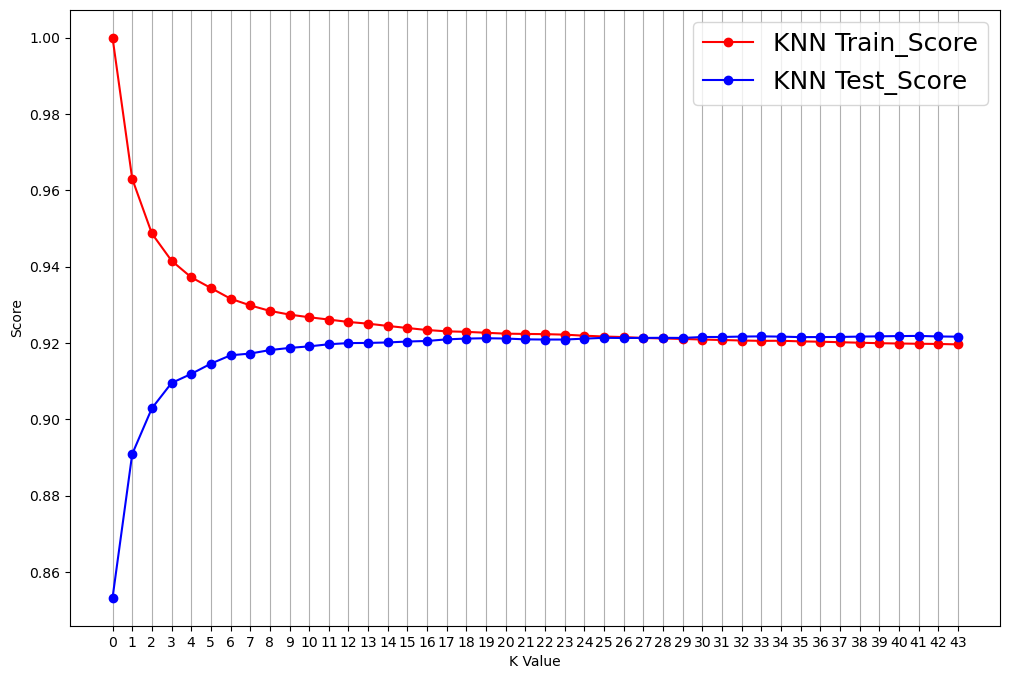

In [139]:
plt.figure(figsize=(12,8))
plt.xlabel('K Value')
plt.ylabel('Score')
plt.plot(train_score, color = 'red', marker = 'o', label = 'KNN Train_Score')
plt.plot(test_score, color = 'blue', marker = 'o', label = 'KNN Test_Score')
plt.legend(loc = 'upper right', fontsize = 18)
plt.xticks(range(k))
plt.grid(axis = 'x')


## Decision Tree

In [140]:
tree = DecisionTreeRegressor()
tree.fit(x_train_sc, y_train)

DecisionTreeRegressor()

In [141]:
print(f'The Trained Decision Tree score is {tree.score(x_train_sc, y_train)}')
print(f'The Test Decision Tree score is {tree.score(x_test_sc, y_test)}')


The Trained Decision Tree score is 0.9998097531306339
The Test Decision Tree score is 0.8672889473680805


#### from above, we see that the Decision Tree is overfitted , we will create Hyperparameter tuning to prevent Overfitting.
- max_depth: let's make the max depth of tree (questions) to 5
- min_sample_split: let's make the minimum number of samples required to split the internal node to 7. Minimum by default is 2. To achieve higher purity, we increase it to 7 nodes.
- min_samples_leaf: let's make the minimum samples required in leaf node to 3 (terminal node at end of tree). By default is 1, which could cause Overfitting.
- ccp_alpha: like a regularisation. 

In [142]:
dt = DecisionTreeRegressor(
        max_depth = 5,
        min_samples_split = 7,
        min_samples_leaf = 3,
        ccp_alpha = 0.01 
)

In [143]:
# Fit model.
dt.fit(x_train_sc,y_train)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=5, min_samples_leaf=3,
                      min_samples_split=7)

In [144]:
# Evaluate model.
print(f'Decision Tree Score on training set: {dt.score(x_train_sc, y_train)}')
print(f'Decision Tree Score on testing set: {dt.score(x_test_sc, y_test)}')

Decision Tree Score on training set: 0.9141035475453186
Decision Tree Score on testing set: 0.9198470466061466


### We can also try to use GridSearchCV to determine the best score, as a Validation for our Decision Tree.

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
grid = GridSearchCV( 
    estimator = DecisionTreeRegressor(),
    param_grid = { 
        'max_depth' : [2,4,6,8],
        'min_samples_split' : [5,10,15,20],
        'min_samples_leaf' : [2,3,4,5,6],
        'ccp_alpha' : [0, 0.001, 0.01, 0.1, 1, 10]
    },
    cv = 5,
    verbose = 1
)

In [147]:
grid.fit(x_train_sc,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=1)

In [148]:
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0, max_depth=6, min_samples_leaf=4,
                      min_samples_split=15)

In [149]:
# Evaluate model.
print(f'Grid Searched Decision Tree Score on training set: {grid.score(x_train_sc, y_train)}')
print(f'Grid Searched Decision Tree Score on testing set: {grid.score(x_test_sc, y_test)}')

Grid Searched Decision Tree Score on training set: 0.9237005085247119
Grid Searched Decision Tree Score on testing set: 0.9249071997892748


### From above, we see that after we used an Optimised Hyperparameter Tuning, both Grid Search Decision Trees of Trained and Test scores has improved by approximately 0.1%.

## Random Forest

In [150]:
forest = RandomForestRegressor(n_jobs =-1)


In [151]:
rf_params = {
    'n_estimators': [100,150,200],
    'max_depth': [None,1,2,3,4,5]
}

In [152]:
gs = GridSearchCV(forest, param_grid = rf_params, cv = 5)

In [153]:
gs.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]})

In [154]:
# Evaluate model.
print(f'Random Forest gridsearched Score on training set: {gs.score(x_train_sc, y_train)}')
print(f'Random Forest gridsearched Score on testing set: {gs.score(x_test_sc, y_test)}')

Random Forest gridsearched Score on training set: 0.98960065554922
Random Forest gridsearched Score on testing set: 0.9322033203295635


In [155]:
print(gs.best_score_)
print(gs.best_params_)

0.9238879291928234
{'max_depth': None, 'n_estimators': 200}


In [156]:
y_pred_rf = gs.predict(x_test_sc)

In [157]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE using RF: ", np.sqrt(mse_rf))

RMSE using RF:  0.41385336533585865


In [158]:
train_score = []
test_score = []


for n in range(10,150):
    forest_determine = RandomForestRegressor(n_jobs =-1, n_estimators= n)
    #X axis
    #train_cvs = cross_val_score(knn_determine, X_train_sc,y_train, cv=7).mean()
    #train_score.append(train_cvs)
    # y axis
    forest_determine.fit(x_train_sc,y_train)
    train_scoring = forest_determine.score(x_train_sc,y_train)
    test_scoring = forest_determine.score(x_test_sc,y_test)
    train_score.append(train_scoring)
    test_score.append(test_scoring)

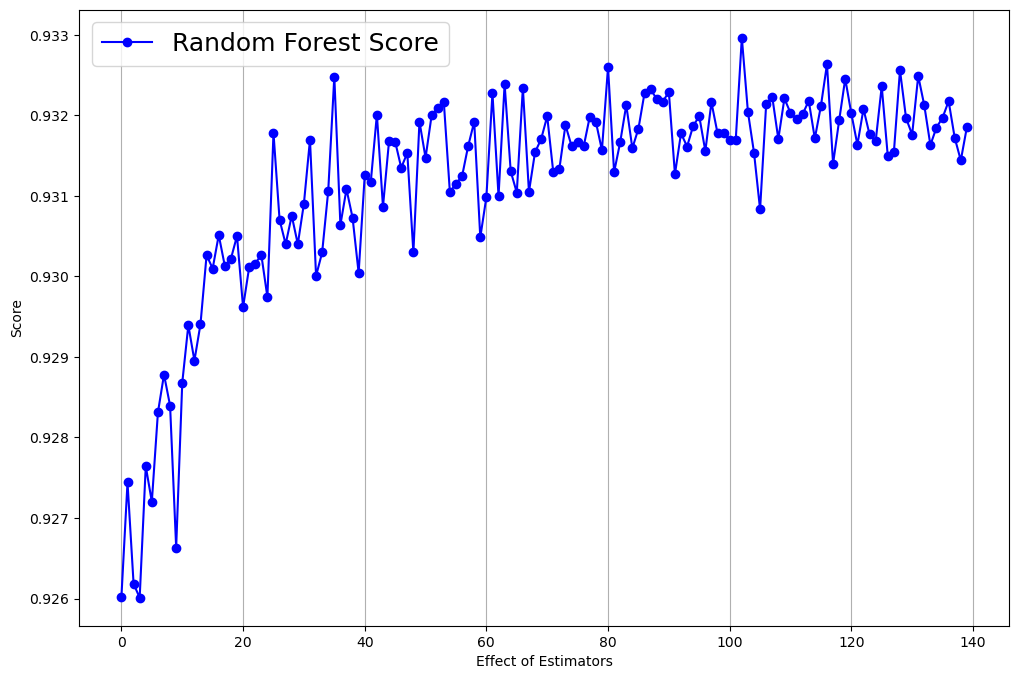

In [159]:
plt.figure(figsize=(12,8))
plt.xlabel('Effect of Estimators')
plt.ylabel('Score')
#plt.plot(train_score, color = 'red', marker = 'o', label = 'Random Forest Train_Score')
plt.plot(test_score, color = 'blue', marker = 'o', label = 'Random Forest Score')
plt.legend(loc = 'upper left', fontsize = 18)

plt.grid(axis = 'x')

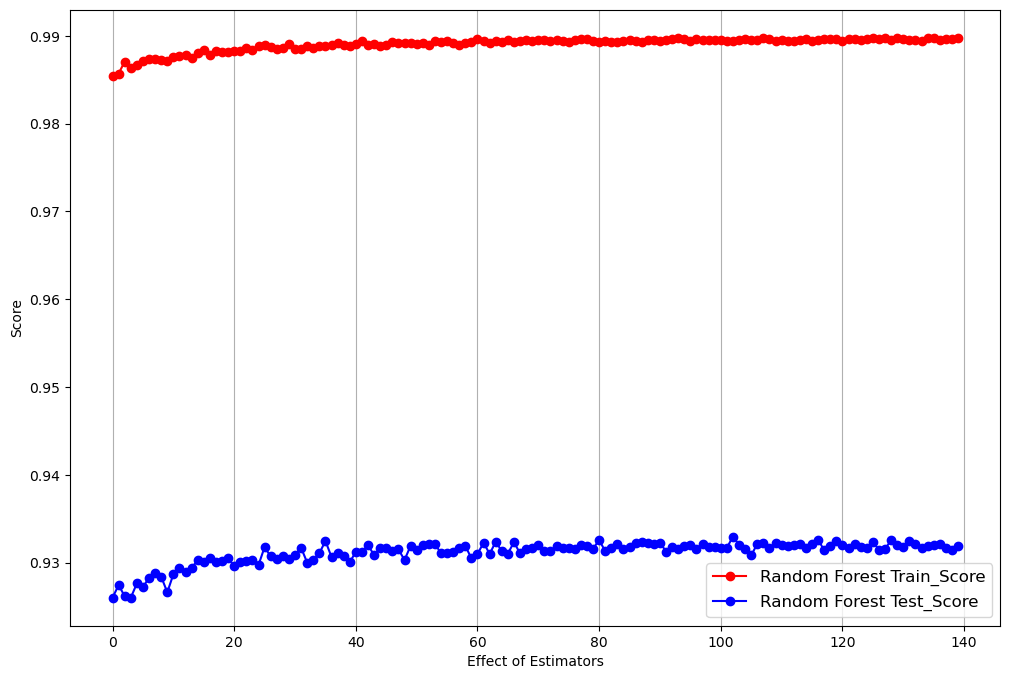

In [160]:
plt.figure(figsize=(12,8))
plt.xlabel('Effect of Estimators')
plt.ylabel('Score')
plt.plot(train_score, color = 'red', marker = 'o', label = 'Random Forest Train_Score')
plt.plot(test_score, color = 'blue', marker = 'o', label = 'Random Forest Test_Score')
plt.legend(loc = 'lower right', fontsize = 12)

plt.grid(axis = 'x')

## KMEANS Clusters

In [161]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0).fit(x_train_sc)
kmeans.labels_
y_kmeans = kmeans.predict(x_test_sc)
y_kmeans

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [162]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.02410026,  0.02487606,  0.0116694 ,  0.0749009 , -0.25097995,
         0.15052031,  0.22668972,  0.26545032,  0.42852164, -0.42933628,
         0.01307716,  0.01545936,  0.01180596,  0.02617657,  0.03687603,
         0.01307716,  0.02848678,  0.02563736,  0.01765793,  0.01739782,
         0.01324899,  0.08350146,  0.03125019,  0.0177866 ,  0.0582986 ,
         0.02930021,  0.01439563,  0.01575043,  0.03258961,  0.01804131,
         0.03810651,  0.02626544,  0.01307716,  0.0335988 ,  0.02798847,
         0.03125019,  0.02705324,  0.02644237,  0.03147692,  0.05056295,
         0.02508745,  0.01985159,  0.01407734, -0.42933628,  0.34540522,
         0.04900979,  0.42857483],
       [-0.13074546, -0.13495421, -0.06330722, -0.40634213,  1.36158215,
        -0.81658224, -1.22980613, -1.44008482, -2.32475713,  2.32917657,
        -0.07094443, -0.083868  , -0.06404808, -0.14200955, -0.20005482,
        -0.07094443, -0.1545426 , -0.13908429, -0.09579537, -0.09438427,
        -0.07187

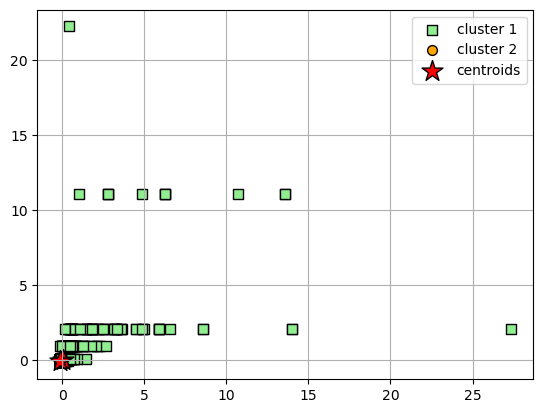

In [163]:
# plot the 2 clusters
plt.scatter(
    x_test_sc[y_kmeans == 0, 0], x_test_sc[y_kmeans == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x_test_sc[y_kmeans == 1, 0], x_test_sc[y_kmeans == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)


# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

#### Hence, we see from above from KMEANS, that KMEANS does not build good clusters, let's determine actual number of clusters through Elbow method.

In [164]:
from yellowbrick.cluster import KElbowVisualizer 

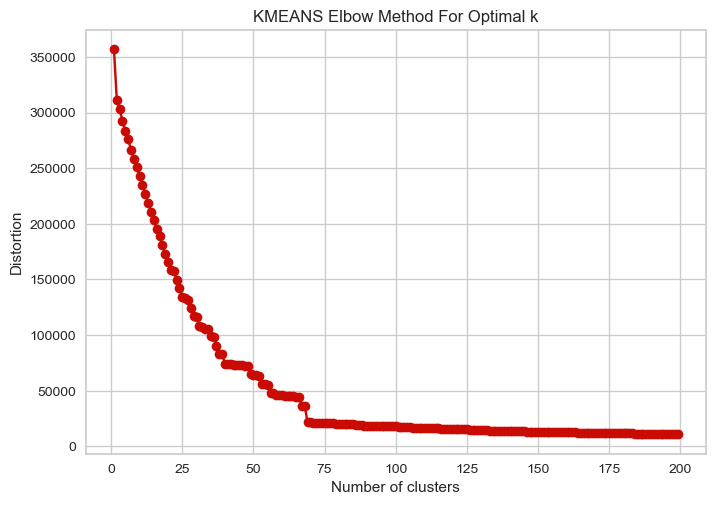

In [165]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 200):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x_train_sc)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 200), distortions, marker='o', color ='r')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('KMEANS Elbow Method For Optimal k')
plt.show()



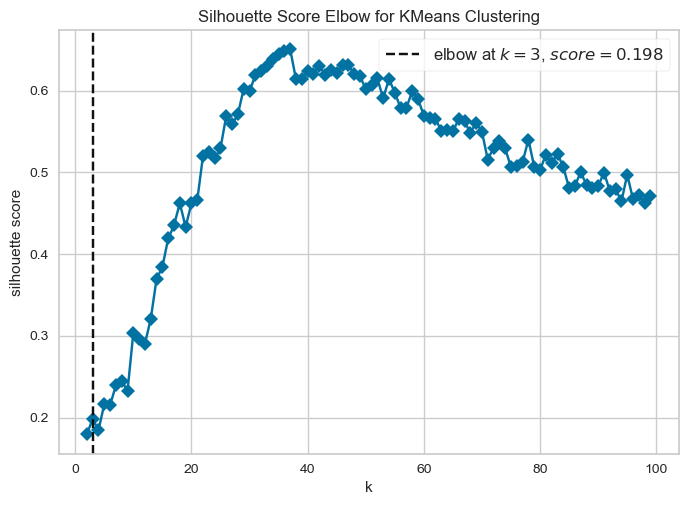

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [166]:
model = KMeans(random_state=123) 
visualizer = KElbowVisualizer(model, k=(2,100), metric='silhouette', timings=False)

visualizer.fit(x_train_sc)    
visualizer.poof()

### from above, we see KMeans is not an ideal model as Centroid between 2 Clusters are not separated far from each other. From above, it requires about 50 Clusters to get optimum K centroids

### DBSCAN

In [167]:
from sklearn.cluster import DBSCAN

##### to find optimum number of clusters 

In [168]:
dbscancluster = DBSCAN(eps =3).fit(x_train_sc)

In [169]:
labels = dbscancluster.labels_

In [170]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscancluster.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)



dbscancluster.labels_

array([ 0,  1,  2, ..., 20,  3,  4])

In [171]:
print(f'Hence, we see that DBSCAN requires {n_clusters} clusters, whereas KMEANS also has about similar number of clusters of also about 50 clusters.')

Hence, we see that DBSCAN requires 52 clusters, whereas KMEANS also has about similar number of clusters of also about 50 clusters.


In [172]:
dbscancluster.fit_predict(x_test_sc)

array([ 0,  1,  2, ...,  6,  2, 29])

In [173]:
dbscancluster.get_params(deep = True)

{'algorithm': 'auto',
 'eps': 3,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

# Natural Language Processing (NLP) on app_reviews_df

In [174]:
app_review_df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [175]:
app_review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [176]:
app_review_df.dropna(axis=0, inplace=True)

In [177]:
app_review_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [178]:
app_review_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


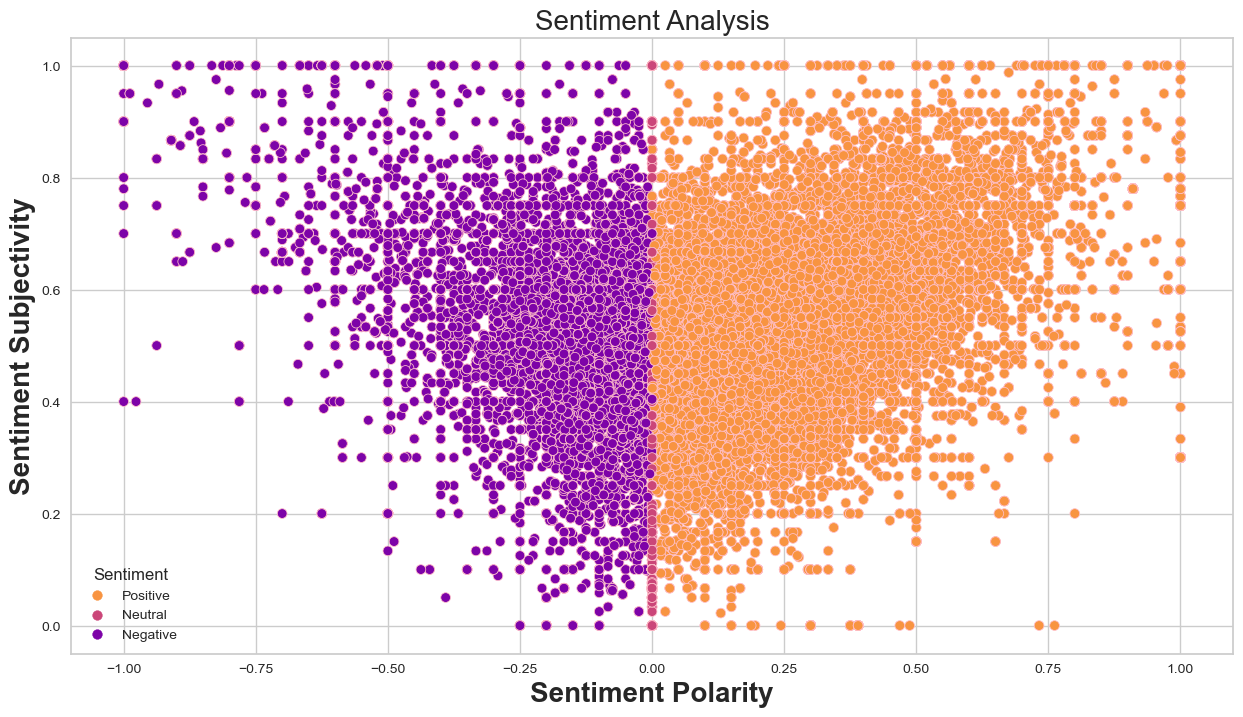

In [179]:

plt.figure(figsize=(15,8))
j = sns.scatterplot(app_review_df['Sentiment_Polarity'],app_review_df['Sentiment_Subjectivity'],hue=app_review_df['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20, fontweight = 'heavy')
plt.ylabel('Sentiment Subjectivity', fontsize=20, fontweight = 'heavy')
plt.title("Sentiment Analysis", fontsize=20)
plt.show()


#### We first convert Sentiment : Positive == '0', Negative == '1', Neutral == '2'

In [180]:
app_review_df['Sentiment_Score']=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in app_review_df['Sentiment']]
app_review_df.head(5)

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Sentiment_Score  
0  Positive                1.00                0.533333                0  
1  Positive                0.25                0.288462                0  
3  Positive                0.40                0.875000                0  
4  Positive                1.00                0.300000                0  
5  Positive                1.00                0.300000                0

### Next, we remove all special characters words which are not letters , example " :) # $ @ ()!-/* "

In [181]:
import re
first_text=app_review_df['Translated_Review'][0]
first=re.sub("[^a-zA-Z]"," ",first_text) #change characters with Space
first=first.lower()

In [182]:
print(app_review_df['Translated_Review'][0]) #lets review of changings # BEFORE
print(first) #AFTER

I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  


### We separate all words now in the FIRST text.

In [183]:
#stopwords (irrelavent words)
import nltk
from nltk.corpus import stopwords
first=nltk.word_tokenize(first) #separate all words


In [184]:
first

['i',
 'like',
 'eat',
 'delicious',
 'food',
 'that',
 's',
 'i',
 'm',
 'cooking',
 'food',
 'myself',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'before',
 'shelf',
 'life']

### Next, we lemmatize it to its root word in FIRST text

In [185]:
#lemmatization books----> book
import nltk as nlp
lemma=nlp.WordNetLemmatizer()
first=[lemma.lemmatize(i) for i in first]
first=" ".join(first)
first

'i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life'

#### Now, we apply it to entire app_review_df Dataset

In [186]:
app_review_df.loc[app_review_df['Sentiment_Polarity'] >0,'Positivity']=1
app_review_df.loc[app_review_df['Sentiment_Polarity'] ==0,'Positivity']=0
app_review_df.loc[app_review_df['Sentiment_Polarity'] <0,'Positivity']=-1

app_review_df.head(5)

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Sentiment_Score  \
0  Positive                1.00                0.533333                0   
1  Positive                0.25                0.288462                0   
3  Positive                0.40                0.875000                0   
4  Positive                1.00                0.300000                0   
5  Positive                1.00                0.300000                0   

   Positivity  
0         1.0  
1         1.0  
3         1.0  
4         1.0  
5         1.0

In [187]:
rp_data = pd.concat([app_review_df['Translated_Review'],app_review_df['Positivity']],axis=1)
rp_data.head(3)

Translated_Review  Positivity
0  I like eat delicious food. That's I'm cooking ...         1.0
1    This help eating healthy exercise regular basis         1.0
3         Works great especially going grocery store         1.0

In [188]:
def prepare(rp_data):
    CleanData=[]

    for descr in rp_data.Translated_Review:
        descr=re.sub("[^a-zA-Z]"," ",descr) 
        descr=descr.lower()
        descr = nltk.word_tokenize(descr)
        descr = [word for word in descr if not word in set(stopwords.words("english"))] 
        lemma = nltk.WordNetLemmatizer()
        descr = [lemma.lemmatize(word) for word in descr]
        descr = " ".join(descr)
        CleanData.append(descr)
    return CleanData
    
CleanData=prepare(rp_data)

In [189]:
CleanData[:10]

['like eat delicious food cooking food case best food help lot also best shelf life',
 'help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'helpful site help food get',
 'good',
 'useful information amount spelling error question validity information shared fixed star given']

##### Here with "bag of words" we removed irrelavent words and creating matrix format in order to make them in order. Also after matrix format ,we will have our sentences with numbers. This means that now our computer can understand human language.

In [190]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer

max_features=200000
cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(CleanData).toarray()
all_words=cou_vec.get_feature_names()
print("Most used words: ",all_words[100:150])

Most used words:  ['accessed', 'accessibility', 'accessible', 'accessing', 'accessory', 'acciden', 'accident', 'accidental', 'accidentally', 'accidently', 'accipio', 'accolade', 'accom', 'accomendations', 'accommodate', 'accommodation', 'accomodation', 'accompany', 'accomplish', 'accomplished', 'accomplishes', 'accomplishing', 'accomplishment', 'acconts', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accounting', 'accra', 'accrues', 'acct', 'accts', 'accumulate', 'accumulated', 'accumulation', 'accuracy', 'accurat', 'accurate', 'accurately', 'accuring', 'accused', 'accuweather', 'ace', 'ache', 'achievable', 'achieve', 'achieved', 'achievement']


/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


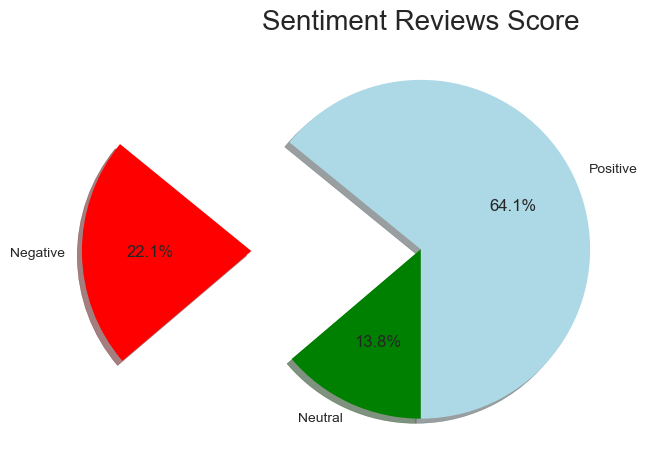

In [191]:
labels = app_review_df['Sentiment'].value_counts(sort = True).index
sizes = app_review_df['Sentiment'].value_counts(sort = True)

colors = ["lightblue","red","green"]
explode = (0,1,0)
#plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%',shadow=True, startangle=270,)
plt.title('Sentiment Reviews Score',size = 20)
plt.show()

In [192]:
from collections import Counter
words_counts = Counter(CleanData)

In [193]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

/Users/gracechongzuting/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


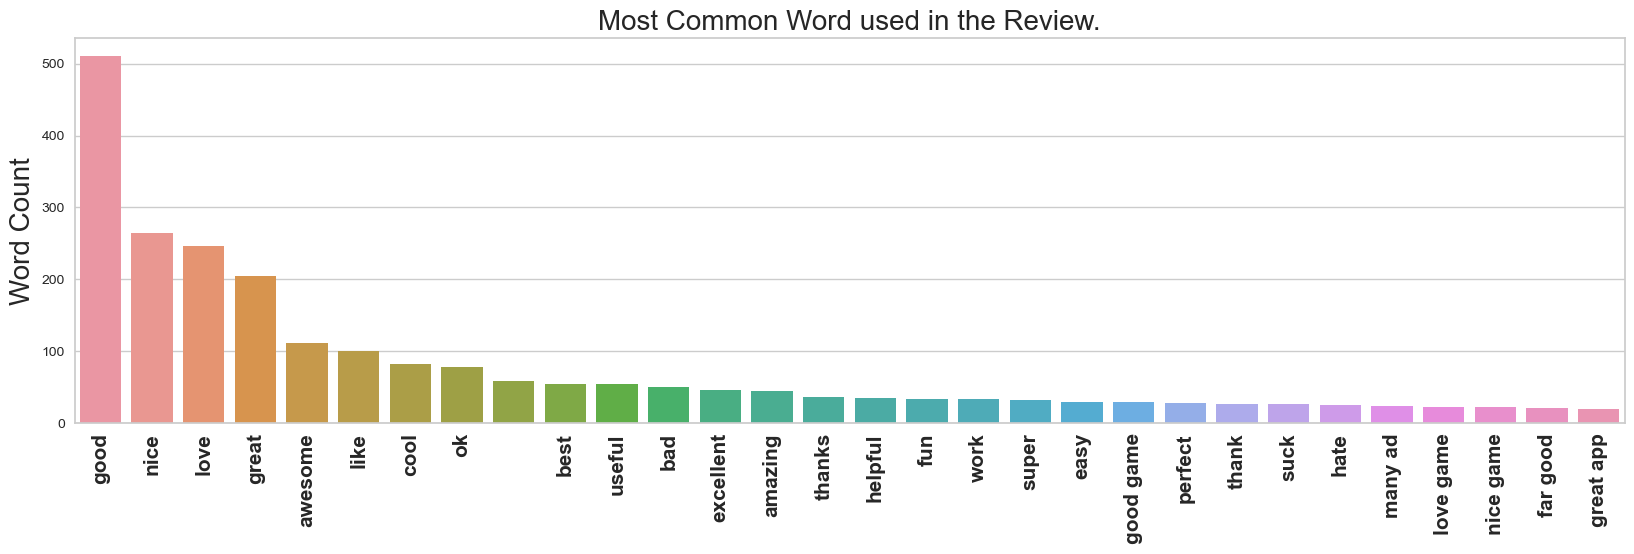

In [194]:
plt.figure(figsize=(20,5))
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=40)
plt.title('Most Common Word used in the Review.', fontsize=20)
plt.xticks(rotation=90,fontweight = 'heavy', fontsize = 15)
plt.show()

### Here, we train our model 

In [195]:
#classification
y=rp_data.iloc[:,1].values
X=sparce_matrix

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Logistic Regression on NLP

In [196]:
# LR on NLP
lr=LogisticRegression(max_iter= 20000)
lr.fit(X_train,y_train)
print("Logistic Regression Train Score: ",lr.score(X_train,y_train))
print("Logistic Regression Test Score: ",lr.score(X_test,y_test))

Logistic Regression Train Score:  0.9698068554851516
Logistic Regression Test Score:  0.9058687327455696


In [197]:
y_pred_lr_nlp = lr.predict(X_test)

In [198]:
mse_lr_nlp = mean_squared_error(y_test, y_pred_lr_nlp)
print("RMSE using NLP LR: ", np.sqrt(mse_lr_nlp))

RMSE using NLP LR:  0.48689294827093565


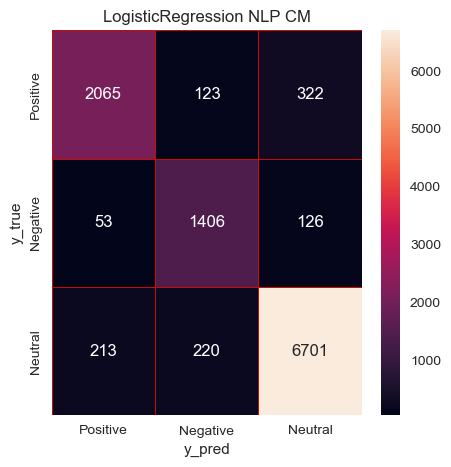

In [199]:
#confusion matrix
y_pred=lr.predict(X_test)
y_true=y_test
from sklearn.metrics import confusion_matrix

names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.title('LogisticRegression NLP CM')
plt.show()


### Naives Bayes on NLP

In [200]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()


In [201]:
nb.fit(X_train,y_train)
print("Naives Bayes Train Score: ",nb.score(X_train,y_train))
print("Naives Bayes Test Score: ",nb.score(X_test,y_test))

Naives Bayes Train Score:  0.5744713336895946
Naives Bayes Test Score:  0.447056728114703


In [202]:
y_pred_nbnlp = nb.predict(X_test)

In [203]:
mse_nb_nlp = mean_squared_error(y_test, y_pred_nbnlp)
print("RMSE using NLP NB: ", np.sqrt(mse_nb_nlp))

RMSE using NLP NB:  1.1695288225416771


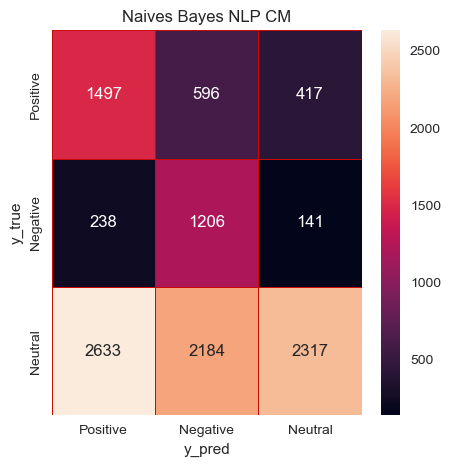

In [204]:
#confusion matrix
y_pred=nb.predict(X_test)
y_true=y_test
from sklearn.metrics import confusion_matrix

names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.title('Naives Bayes NLP CM')
plt.show()

In [205]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(X_train,y_train)
print("Random Forest NLP Train Score: ",rf.score(X_train,y_train))
print("Random Forest NLP Train Score: ",rf.score(X_test,y_test))

Random Forest NLP Train Score:  0.9927475379799985
Random Forest NLP Train Score:  0.8739869979517321


In [206]:
y_pred_rfnlp = rf.predict(X_test)

In [207]:
mse_rf_nlp = mean_squared_error(y_test, y_pred_rfnlp)
print("RMSE using NLP RF: ", np.sqrt(mse_rf_nlp))

RMSE using NLP RF:  0.5901648874288482


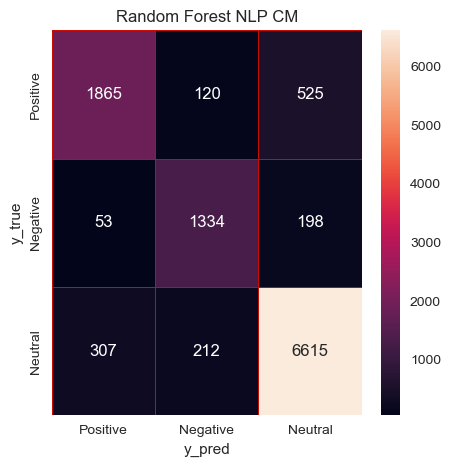

In [208]:
#confussion matrix
y_pred=rf.predict(X_test)
y_true=y_test

names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Random Forest NLP CM')
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [209]:

from wordcloud import WordCloud

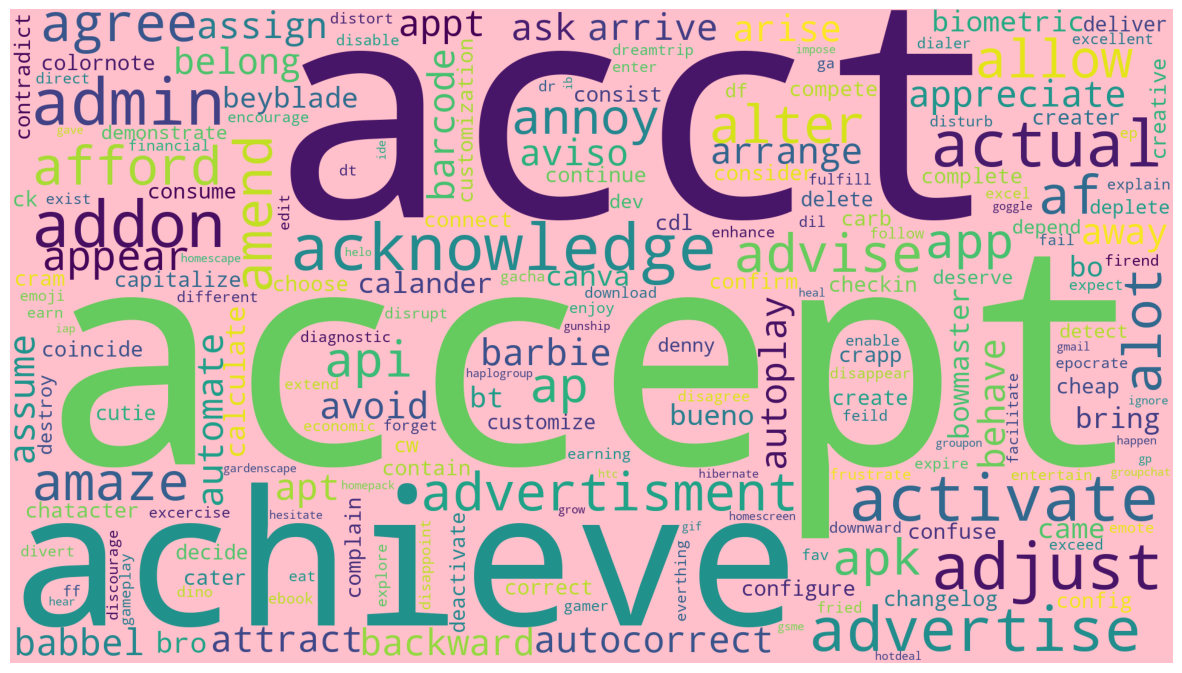

In [210]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='pink',
                          width=1920,
                          height=1080
                         ).generate(" ".join(all_words[50:]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()